## Ejemplos

### Procesamiento de imágenes

Vamos a representar las imágenes como matrices $\mathbf{R}^{n\ \times\  m\  \times\  k}$. Usaremos primero el método decomposición de matrices conocido como [*Single Value Decomposition*](http://en.wikipedia.org/wiki/Singular_value_decomposition) (**SVD**) para reducir el tamaño de la imagen.

La **SVD** de una matriz (real o compleja) $\textbf{M}$ de $m \times n$ es una factorización de la forma $\textbf{M} = U\cdot S \cdot V^*$, en la cual $U$ es matriz $m \times m$ unitaria, $S$ es una matriz $m \times n$ rectangular diagonal con elementos no-negativos, y $V^*$ es la conjugada traspuesta de una matriz unitaria de $n \times n$.

A los elementos de la diagonal $S_{ii}$ of $S$ se les denomina valores singulares de $\textbf{M}$. A las $m$ columnas de $U$ y a las $n$ de $V$ se les llama vectores singulares izquierdos o derechos, respectivamente.

 
Cuando $\textbf{M}$ es cuadrada ( $m \times m$) y  real con determinante positivo, $U$, $V^*$, y $S$ son matrices reales de $m \times m$, entonces $S$ puede ser interpretada como una matriz de escalamiento, y  $U$, $V^*$ como matrices de rotación.

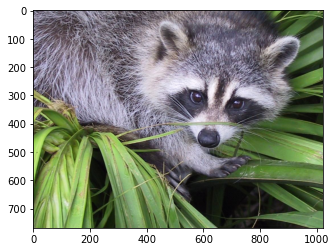

In [2]:
import scipy.misc
from scipy import linalg
import matplotlib.pyplot as plt
import numpy
img = scipy.misc.face()
plt.imshow(img)

In [18]:
img

array([[[121, 112, 131],
        [138, 129, 148],
        [153, 144, 165],
        ...,
        [119, 126,  74],
        [131, 136,  82],
        [139, 144,  90]],

       [[ 89,  82, 100],
        [110, 103, 121],
        [130, 122, 143],
        ...,
        [118, 125,  71],
        [134, 141,  87],
        [146, 153,  99]],

       [[ 73,  66,  84],
        [ 94,  87, 105],
        [115, 108, 126],
        ...,
        [117, 126,  71],
        [133, 142,  87],
        [144, 153,  98]],

       ...,

       [[ 87, 106,  76],
        [ 94, 110,  81],
        [107, 124,  92],
        ...,
        [120, 158,  97],
        [119, 157,  96],
        [119, 158,  95]],

       [[ 85, 101,  72],
        [ 95, 111,  82],
        [112, 127,  96],
        ...,
        [121, 157,  96],
        [120, 156,  94],
        [120, 156,  94]],

       [[ 85, 101,  74],
        [ 97, 113,  84],
        [111, 126,  97],
        ...,
        [120, 156,  95],
        [119, 155,  93],
        [118, 154,  92]]

In [20]:
img.shape

(768, 1024, 3)

In [19]:
U, S, Vs = linalg.svd(img[:,:,2])
print(U.shape)
print(S.shape)
print(Vs.shape)

(768, 768)
(768,)
(1024, 1024)


La matriz $S$ está representada como una matriz _sparse_. Como queremos hacer una compresión de la imagen, sólo nos quedaremos con $32$ de los _valores singulares_. Creamos una nueva matriz cuyos elementos están dados por la siguiente fórmula:

$$ \Sigma^k_{j = 1} \quad s_j(u_j \cdot v_j) $$


donde, $s$ son los valores singulares, $u$ y $v$ son los vectores singulares.

In [21]:
A = numpy.dot( U[:, 0:32], numpy.dot(numpy.diag(S[0:32]), Vs[0:32,:]))

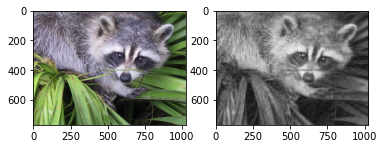

In [22]:
plt.subplot(121, aspect='equal'); plt.imshow(img);
plt.gray()

plt.subplot(122, aspect='equal'); plt.imshow(A);

### Autómatas Celulares

Un [autómata celular](http://en.wikipedia.org/wiki/Cellular_automaton) (**CA**) es un modelo del mundo con física simple. Se les conoce como _autómatas celulares_ ya que el espacio está dividido en pedazos discretos, llamados _celdas_ (de ahí "celular") y a que computa (i.e. es un "autómata").

Los **CA** están gobernados por _reglas_ (la física) que determina como evoluciona el sistema en el tiempo. El tiempo también está dividido en pasos (_steps_) dicretos, y la regla especifica como cambia el estado actual del "mundo" en el tiempo $t+1$ basado en el tiempo actual $t$.

Los **CA** fueron estudiados extensivamente a principios de los 80s por **Stephen Wolfram** (Sí, el de `Mathematica`). En particular el estudio **CA**s unidimensionales, llamadas _autómatas celulares elementales_.

Un _autómata celular elemental_ es un **CA** 1D en la cual cada celda tiene dos posibles estados, y en la cual la regla tiene como entradas el estado actual de la celda y el estado de sus vecinos inmediatos (que son dos en 1D). Existen, entonces $2^3 = 8$ posibles patrones de tres celdas (_vecindad_) y $2^8 = 256$ reglas posibles.

Por ejemplo:

| Estado |  | | | | | | | |
|:---|:-------------:|:-----------:|:------:|:------:|:--:|:--:|:--:|:--:|
| Actual | 111 | 110 | 101 | 100 | 011 | 010 | 001 | 000|
| Siguiente | 0 |0 | 1 | 1 | 0 | 0 | 1 | 0 |

Wolfram sugirió nombrar las reglas usando el renglón inferior como binario. En el caso recién mostrado, es la **Regla 50**.

![Rule30](https://upload.wikimedia.org/wikipedia/commons/e/e2/One-d-cellular-automate-rule-30.gif "ca")


El siguiente código está basado en el trabajo de Allen B. Downey. Representa un autómata celular.

In [6]:
import numpy as np

# Basado en el código de Allen B. Downey


class CA(object):
    """Representa un autómata celular 1D.
    
    Los parámetros del constructor son:

    rule:  Un entero del 0-255.
    n:      Número de renglones (timesteps).
    ratio:  Razón de los renglones a las columnas
    """

    def __init__(self, rule, n=100, ratio=2):
        """
        Atributos:
        table:  Diccionario que mapea el estado, al siguiente.
        n, m:   Renglones, columnas.
        array:  Arreglo que contiene los datos.
        next:   Índice del siguiente estado.
        """
        self.table = self.make_table(rule)
        self.n = n
        self.m = ratio*n + 1
        self.array = np.zeros((n, self.m), dtype=np.int8)
        self.next = 0

    def make_table(self, rule):
        """Regresa la tabla con las reglas del CA 
        (Implementada como un diccionario).
        """
        table = {}
        for i, bit in enumerate(binary(rule, 8)):
            t = binary(7-i, 3)
            table[t] = bit
        return table
    
    def start_single(self):
        """La semilla es una sola y aparece a la mitad del arreglo 1D."""
        self.array[0, int(self.m/2)] = 1
        self.next += 1

    def start_random(self):
        """Valores aleatorios en el tiempo t_0"""
        self.array[0] = np.random.random([1,self.m]).round()
        self.next += 1

    def loop(self, steps=1):
        """Ejecuta el número especificado de pasos."""
        [self.step() for i in range(steps)]

    def step(self):
        """Avanza un paso t -> t+1."""
        i = self.next
        self.next += 1

        a = self.array
        t = self.table
        for j in range(1,self.m-1):
            a[i,j] = t[tuple(a[i-1, j-1:j+2])]

    def get_array(self, start=0, end=None):
        """Obtiene una rebanada de las columnas del CA.
        """
        if start==0 and end==None:
            return self.array
        else:
            return self.array[:, start:end]

  

In [5]:
# Basado en el código de Allen B. Downey

def binary(n, digits):
    """Regresa una tupla de enteros representando (n) en binario."""
    t = []
    for i in range(digits):
        n, r = divmod(n, 2)
        t.append(r)

    return tuple(reversed(t))


In [4]:
import numpy

# Basado en el código de Allen B. Downey
  
class CADrawer(object):
    """Dibuja el CA usando matplotlib"""

    def __init__(self):
        # we only need to import pyplot if a PyplotDrawer
        # gets instantiated
        global pyplot
        import matplotlib.pyplot as pyplot
        
    def draw(self, ca, start=0, end=None):
        pyplot.figure(figsize=(8, 6), dpi=80)
        pyplot.gray()
        a = ca.get_array(start, end)
        rows, cols = a.shape

        # flipud puts the first row at the top; 
        # negating it makes the non-zero cells black.
        pyplot.pcolor(-numpy.flipud(a))
        pyplot.axis([0, cols, 0, rows])

        # empty lists draw no ticks
        pyplot.xticks([])
        pyplot.yticks([])

    def show(self):
        """display the pseudocolor representation of the CA"""
        pyplot.show()

    def save(self, filename='ca.png'):
        """save the pseudocolor representation of the CA in (filename)."""
        pyplot.savefig(filename)
    

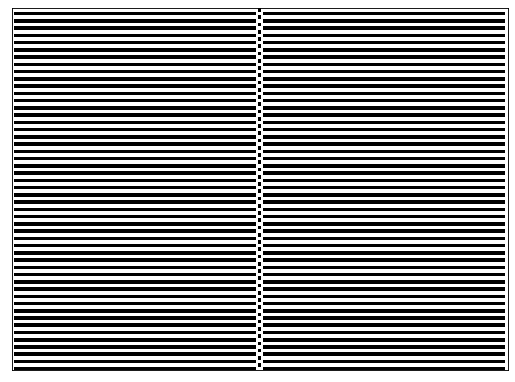

In [7]:
rule = 1
n = 100
ca = CA(rule, n)
ca.start_single()
ca.loop(n-1)
drawer = CADrawer()
drawer.draw(ca)
drawer.show()

<div class="alert alert-info">
    
**Ejercicio:** Escribe un método que genere las 255 reglas y las muestre en una gráfica (con _subplots_, obviamente).
</div>

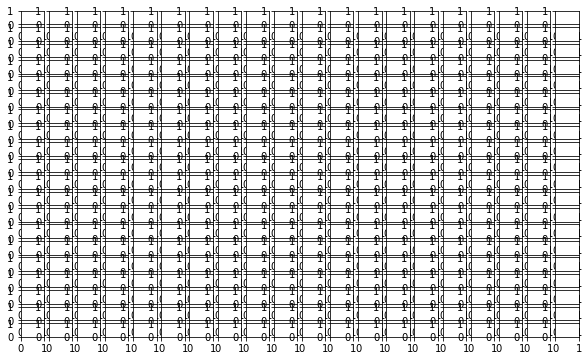

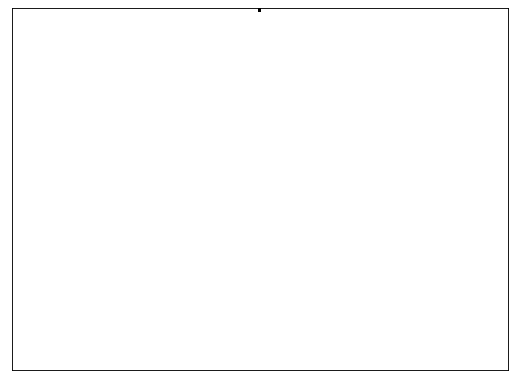

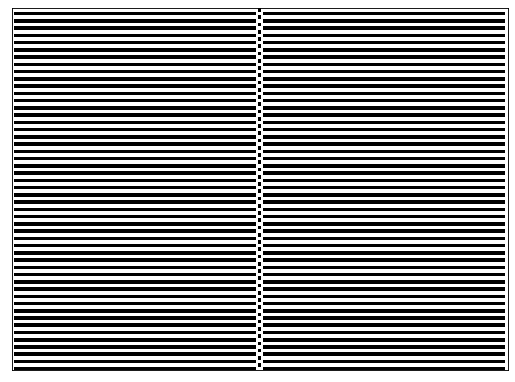

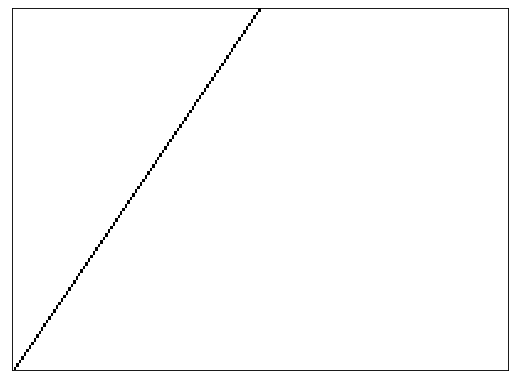

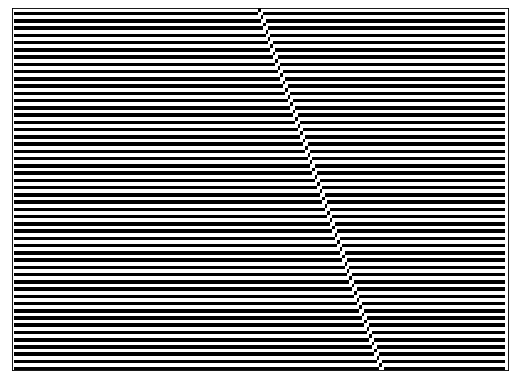

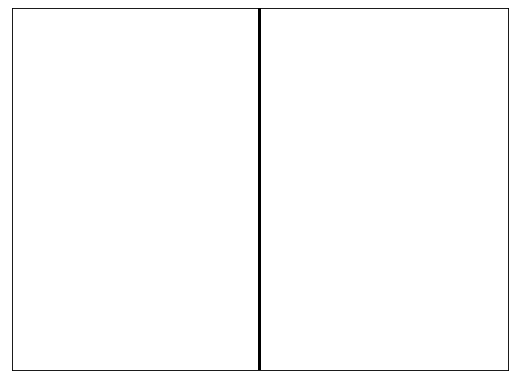

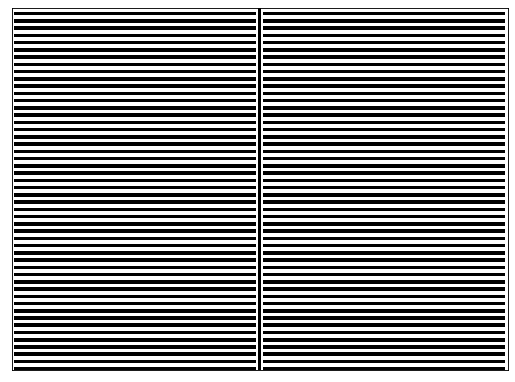

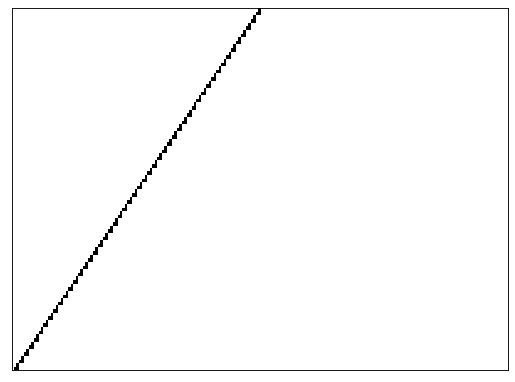

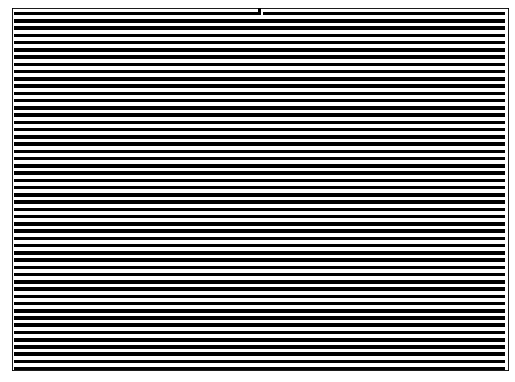

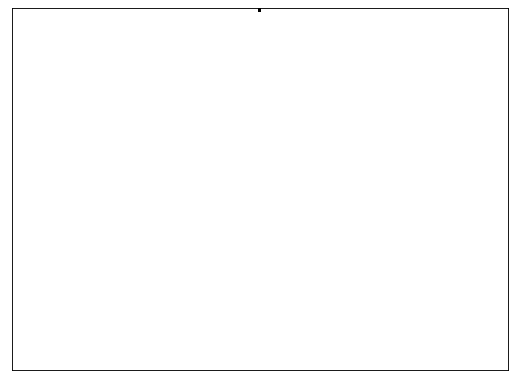

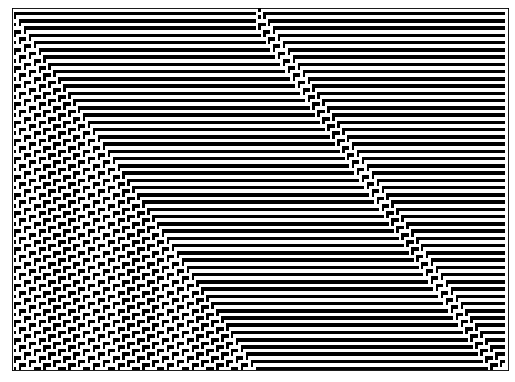

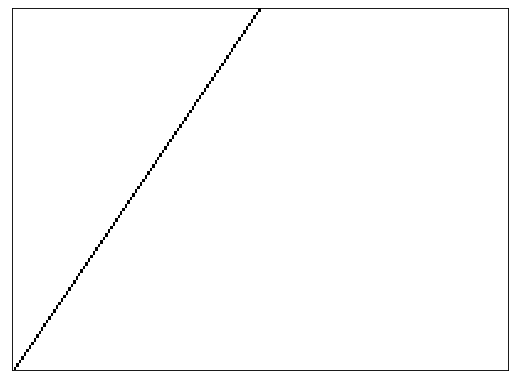

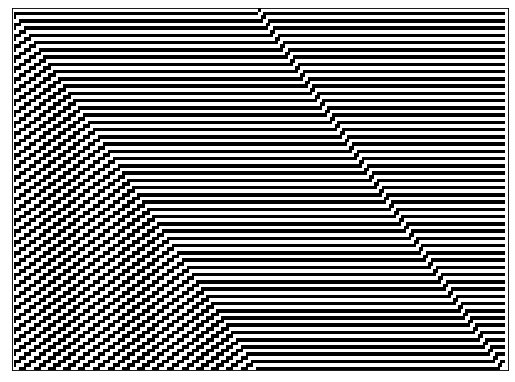

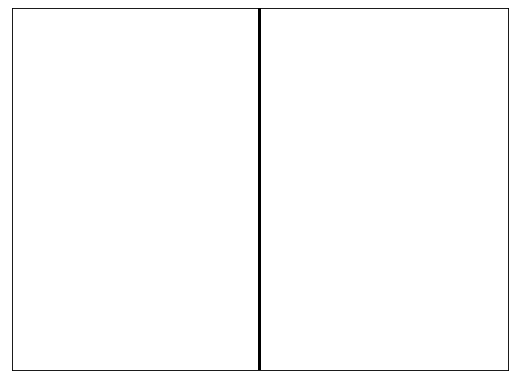

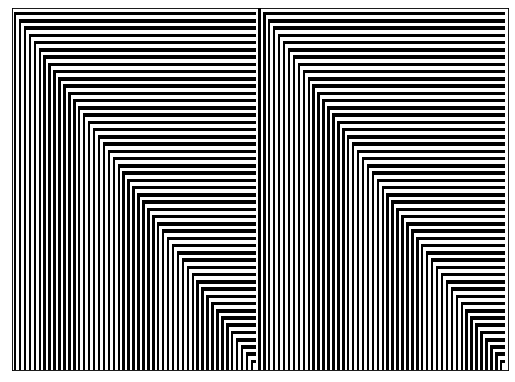

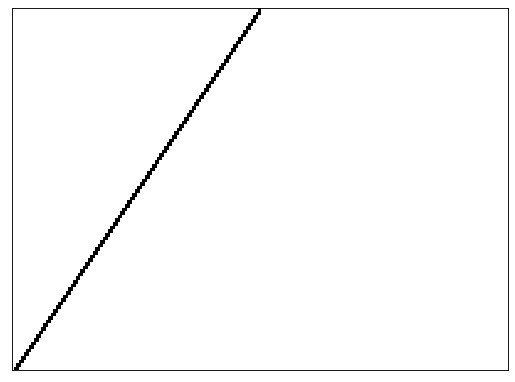

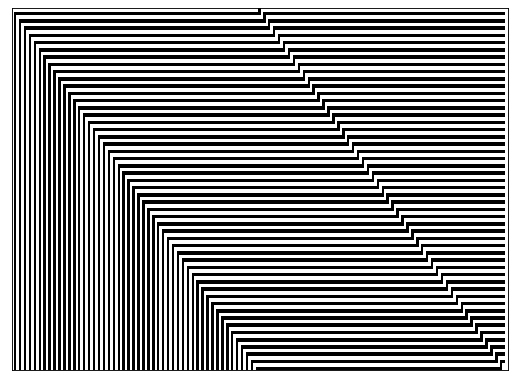

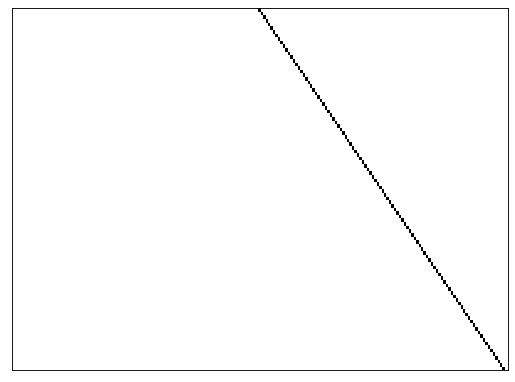

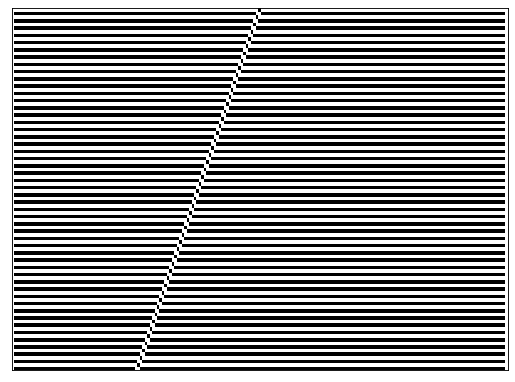

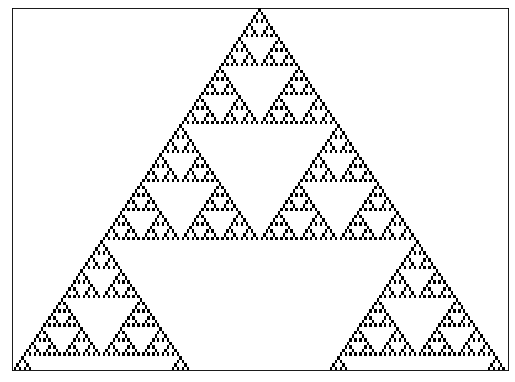

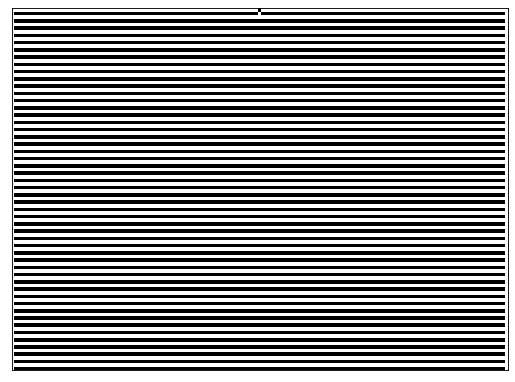

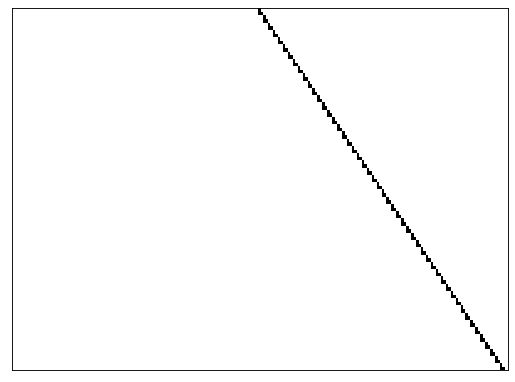

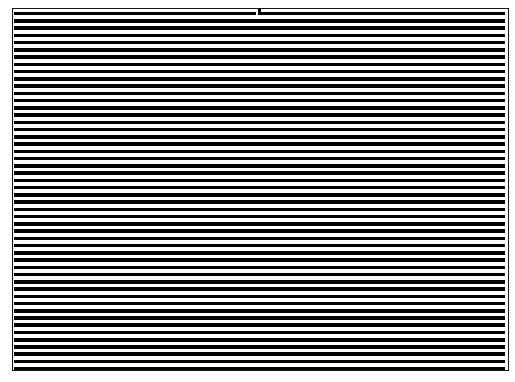

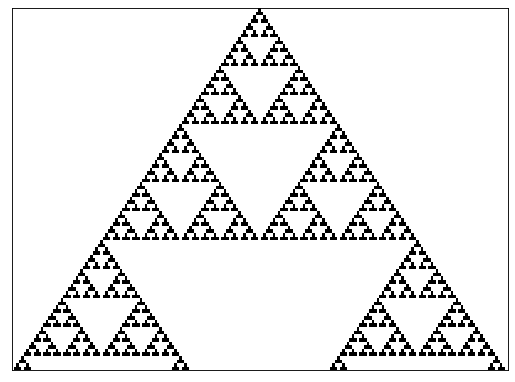

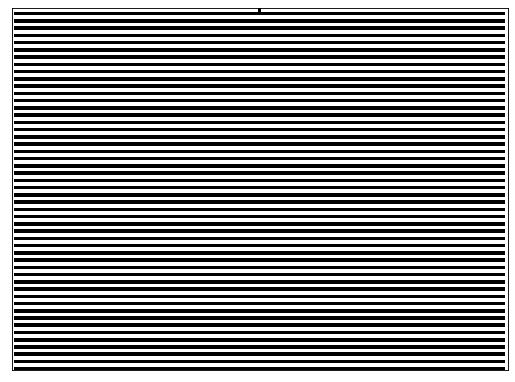

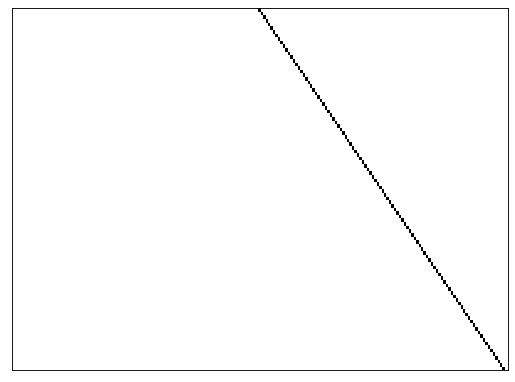

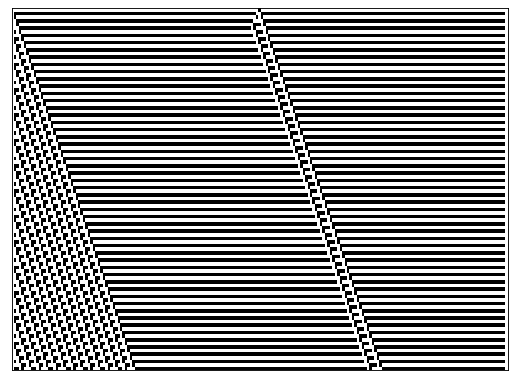

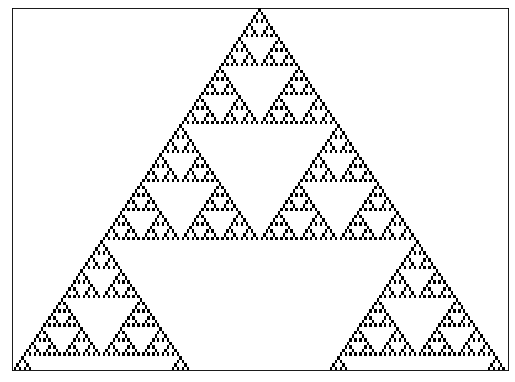

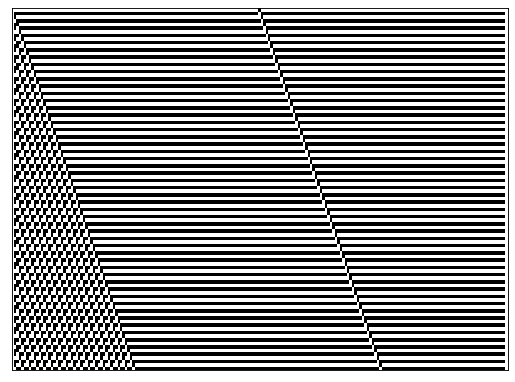

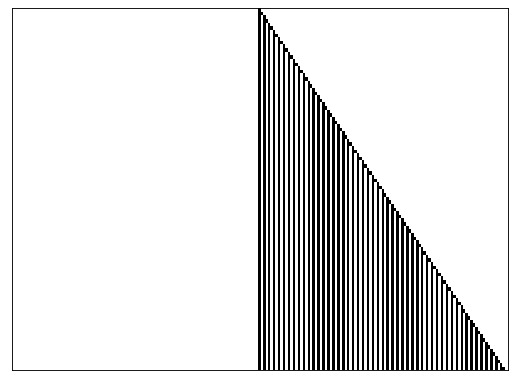

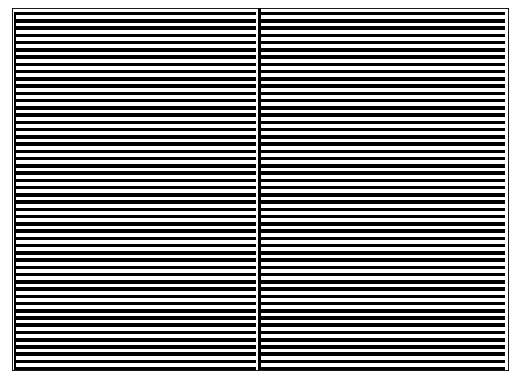

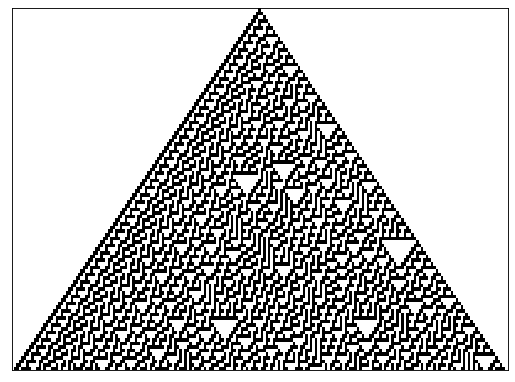

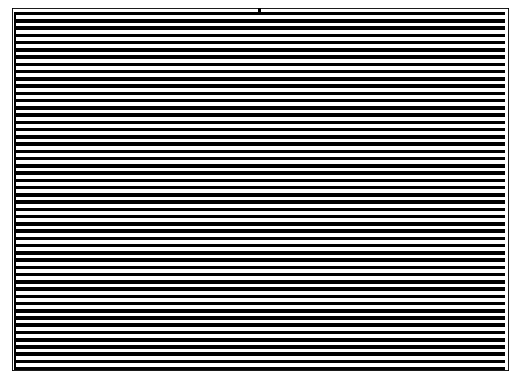

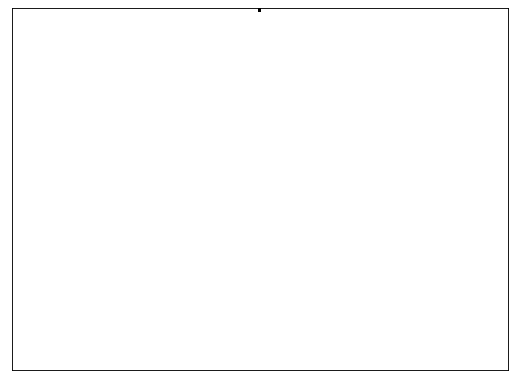

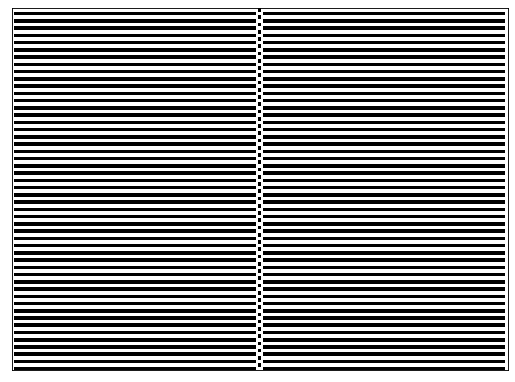

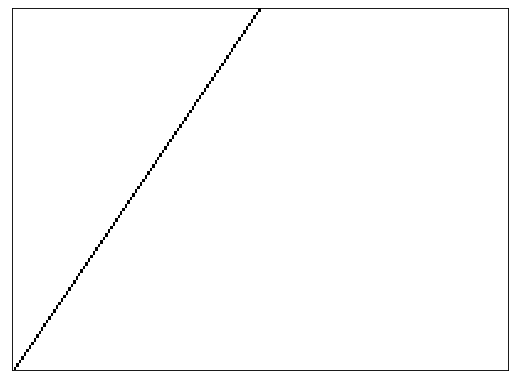

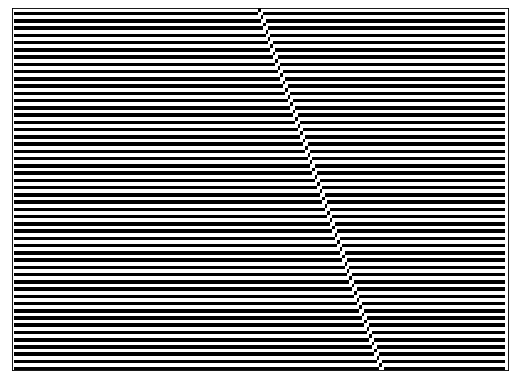

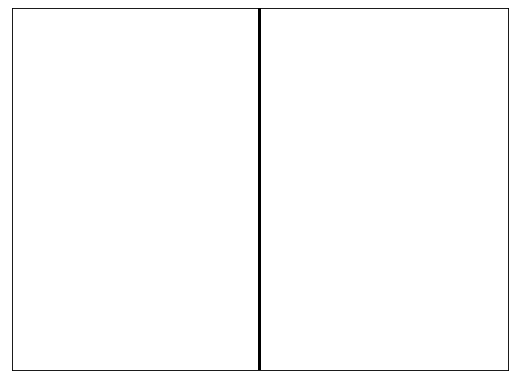

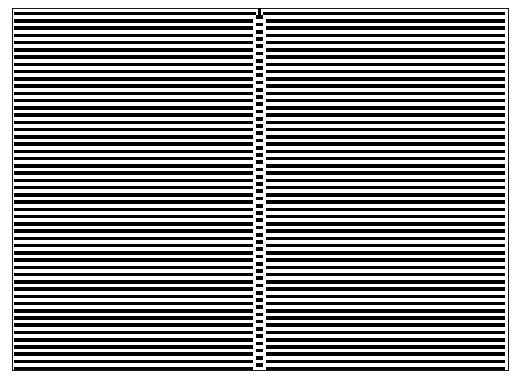

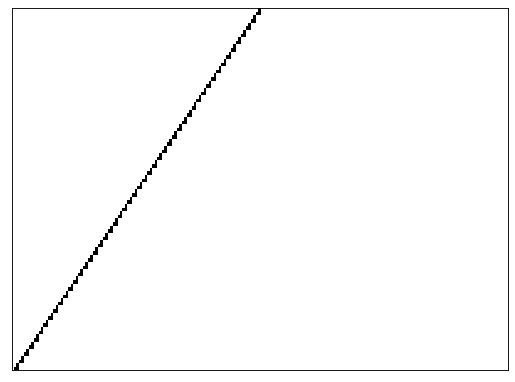

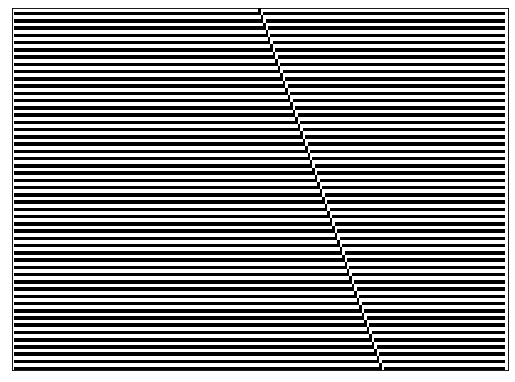

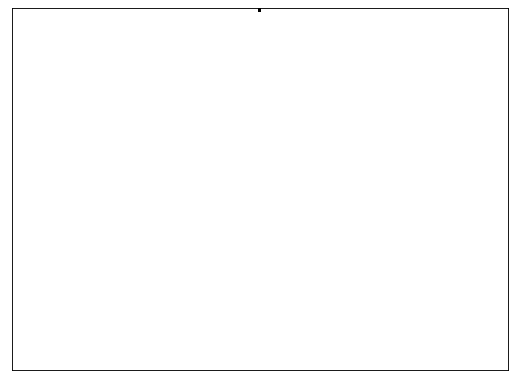

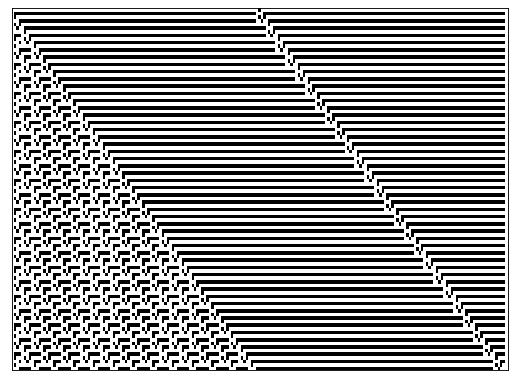

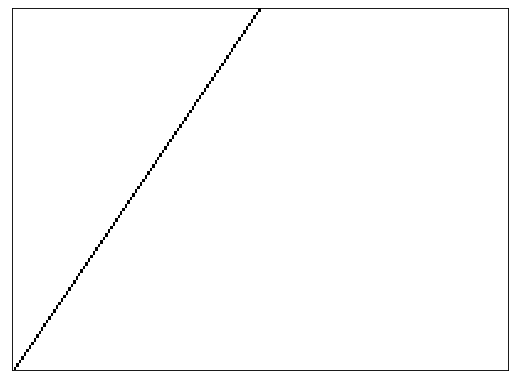

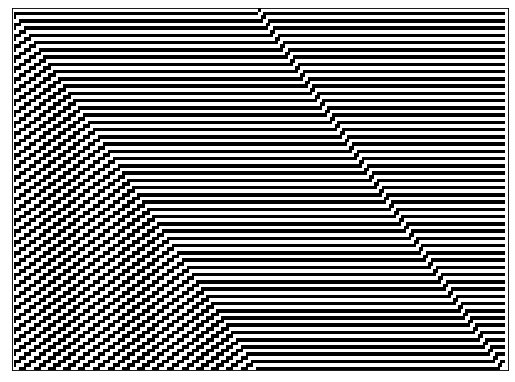

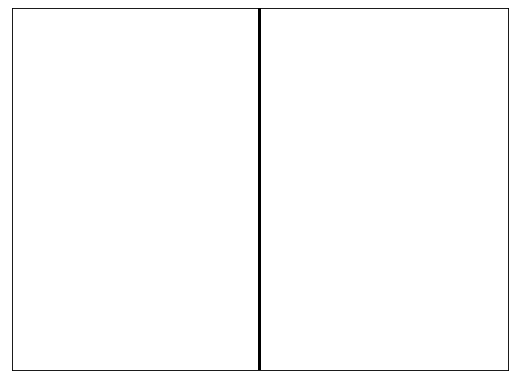

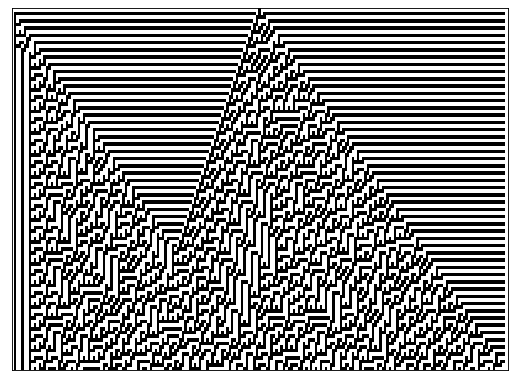

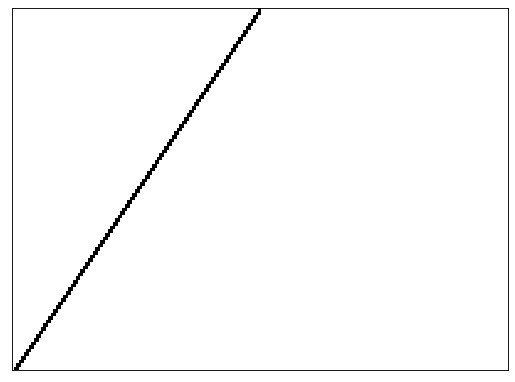

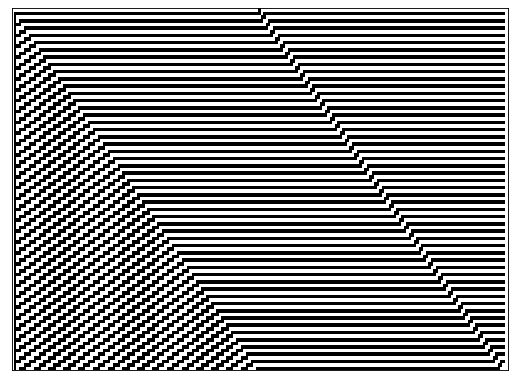

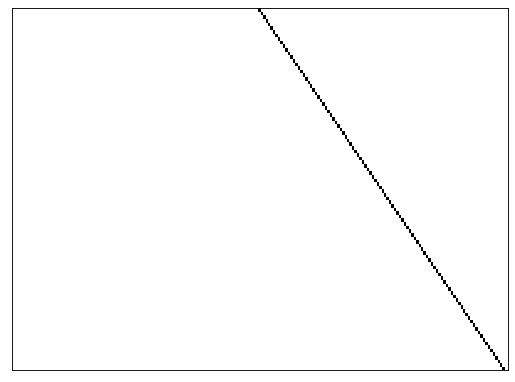

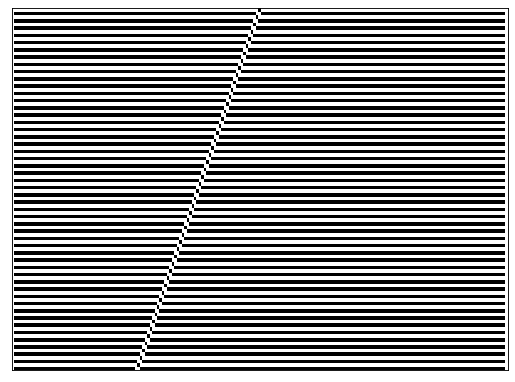

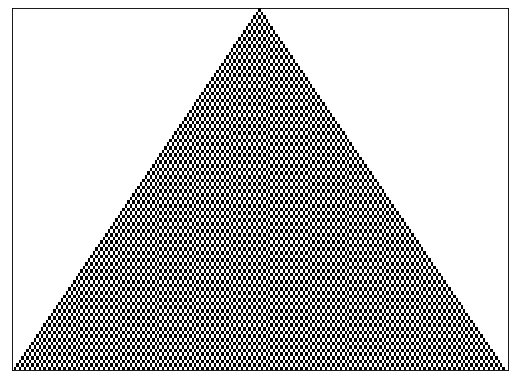

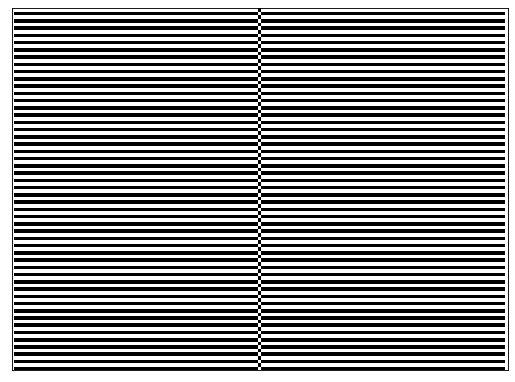

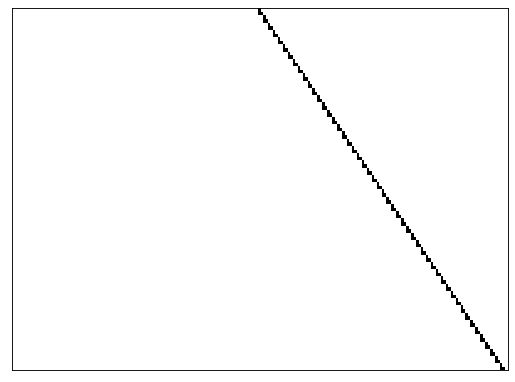

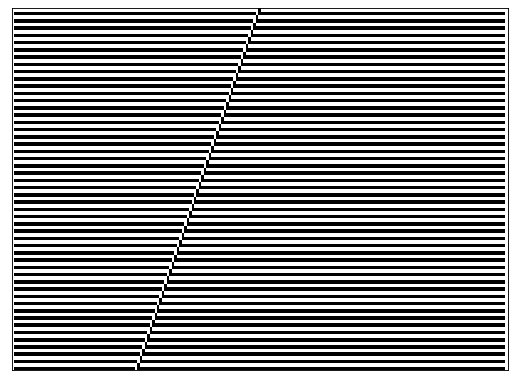

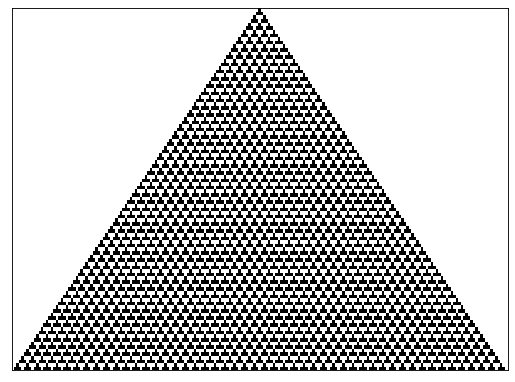

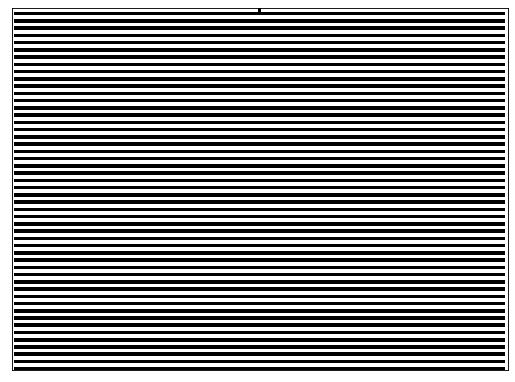

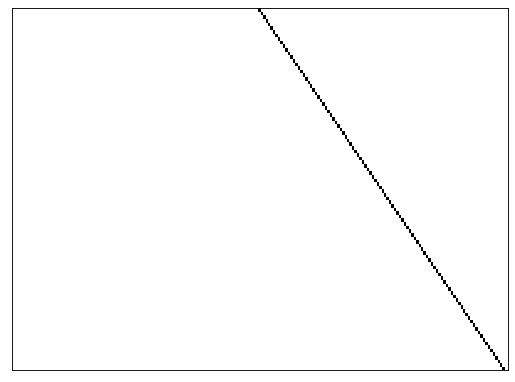

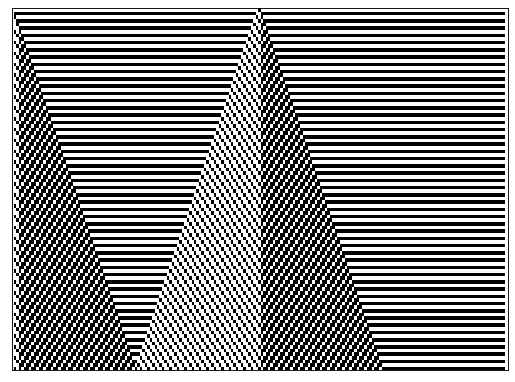

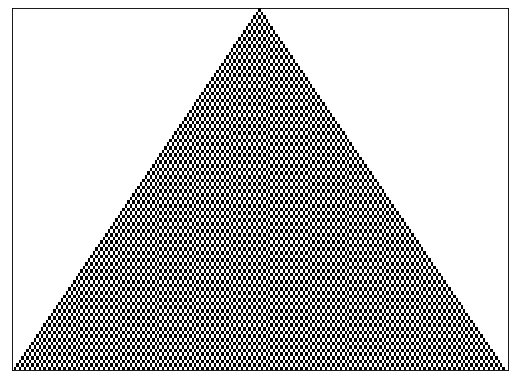

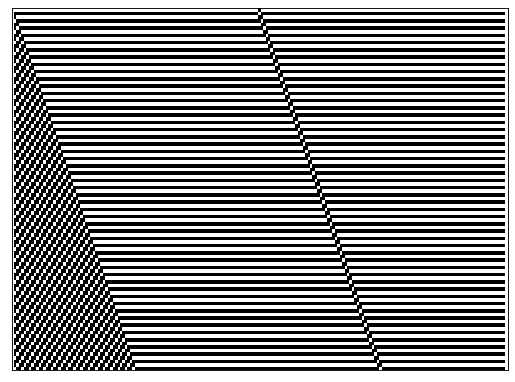

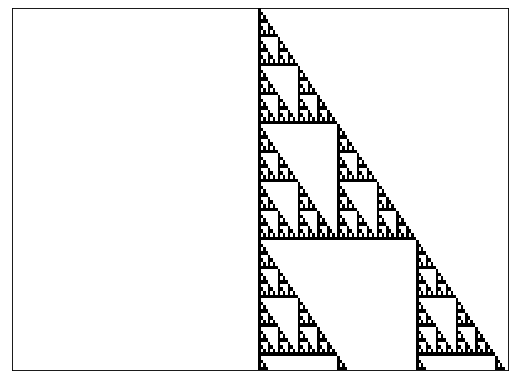

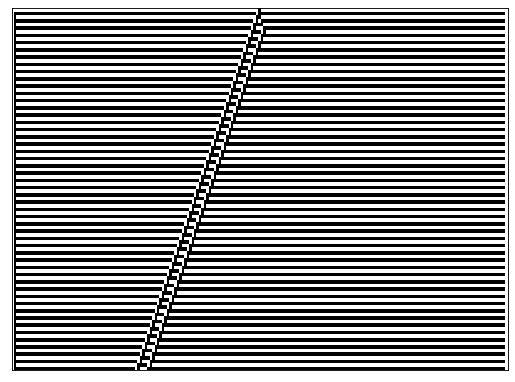

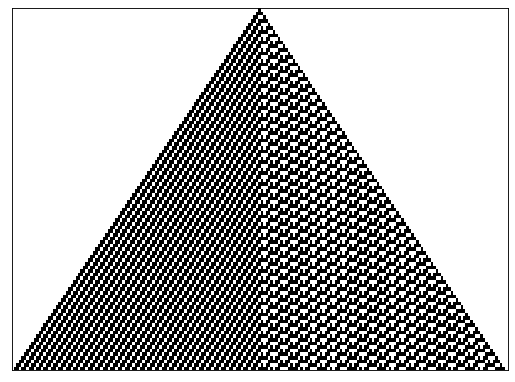

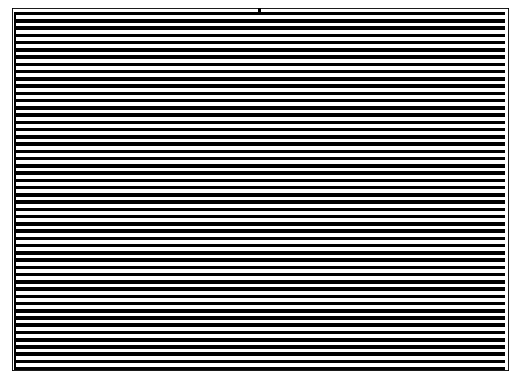

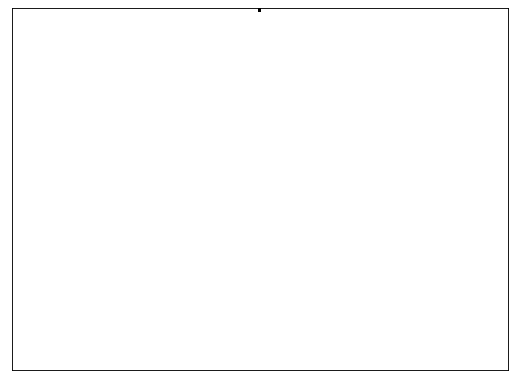

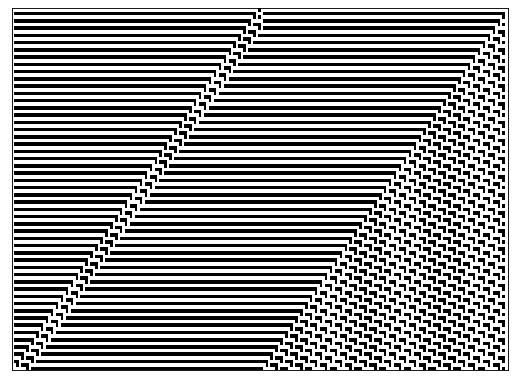

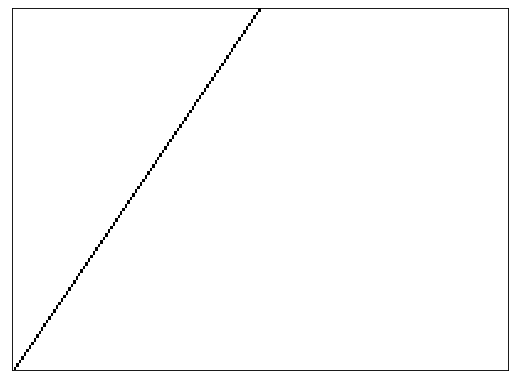

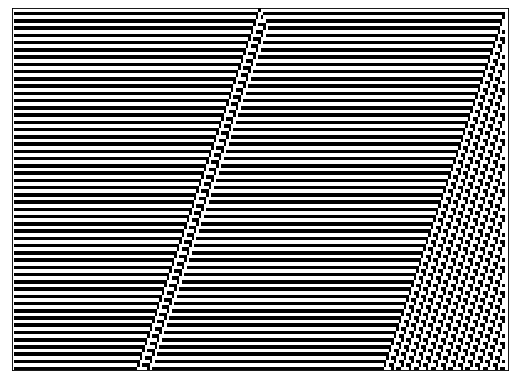

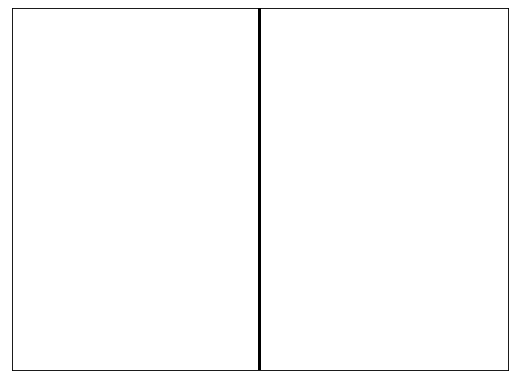

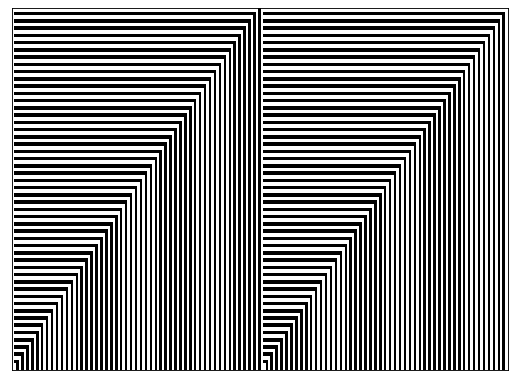

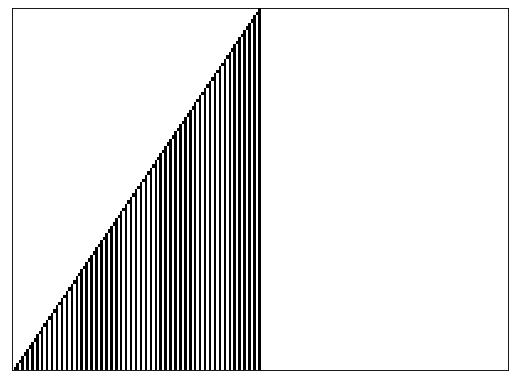

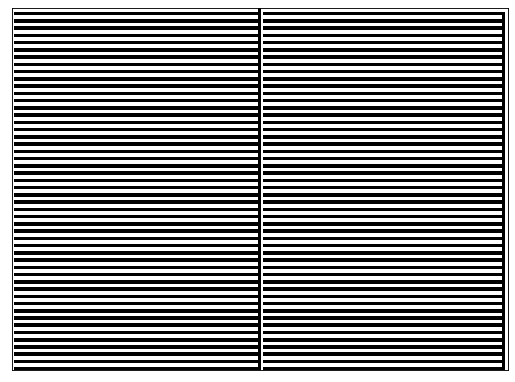

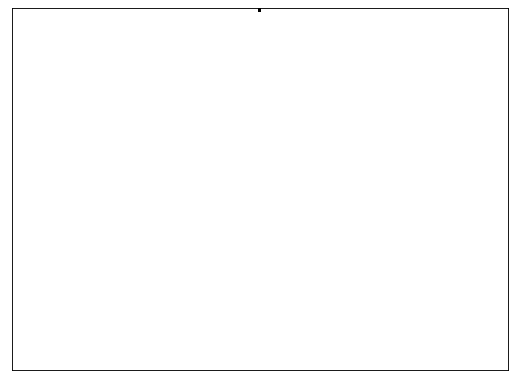

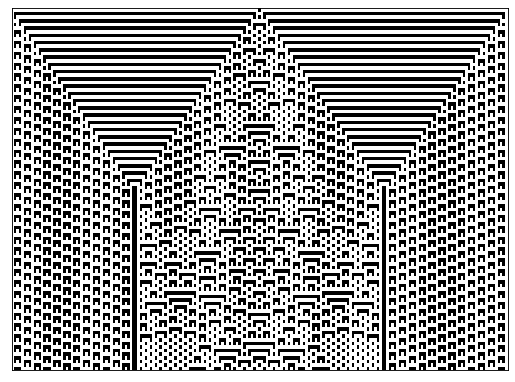

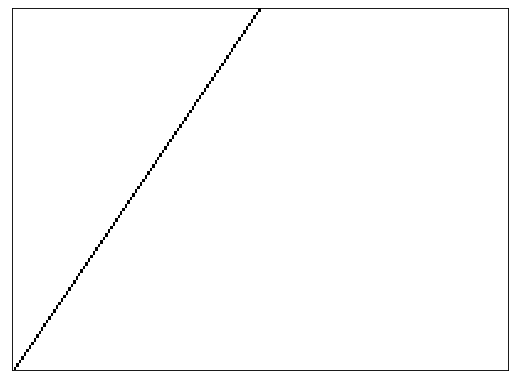

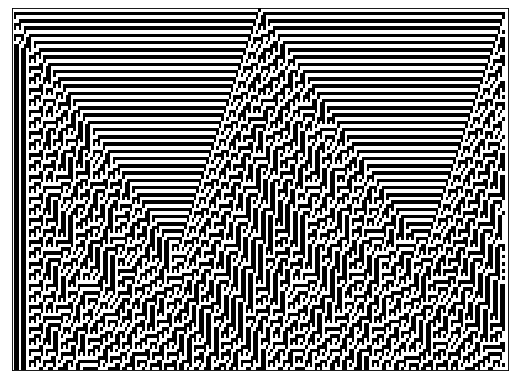

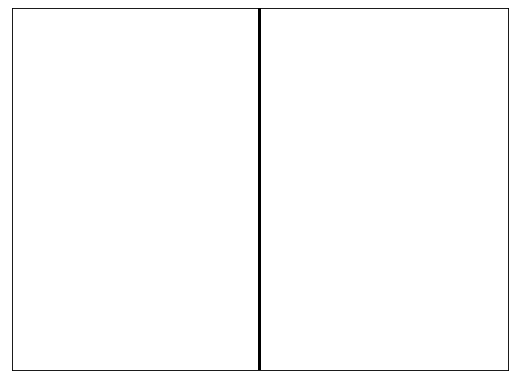

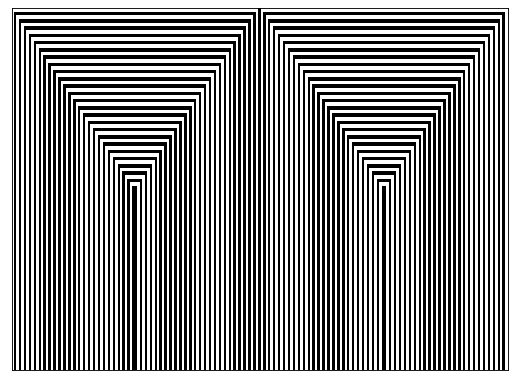

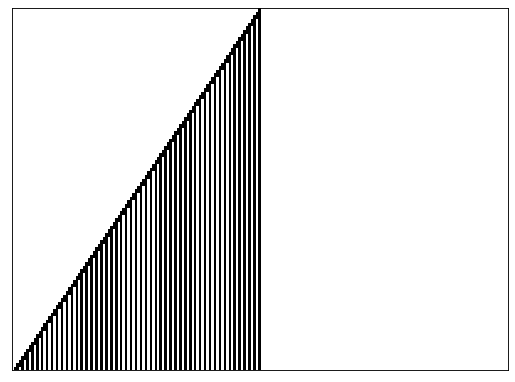

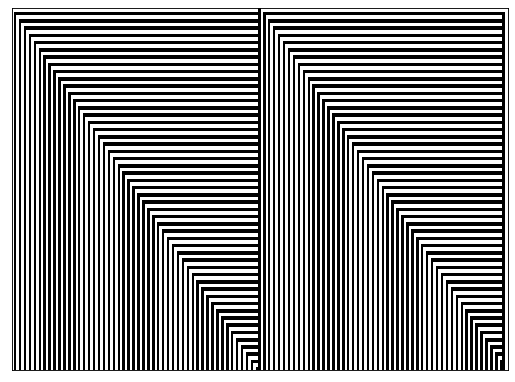

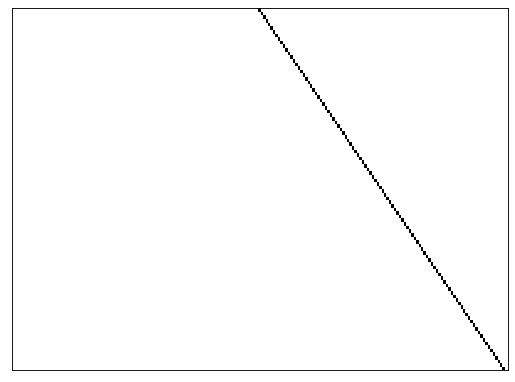

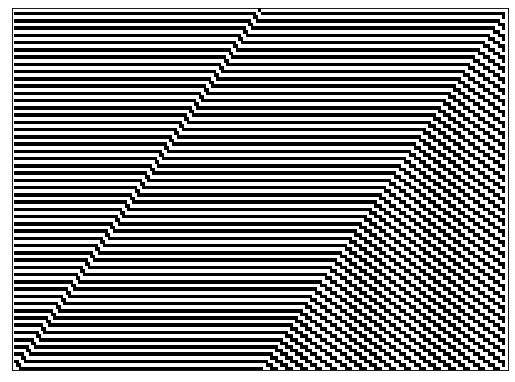

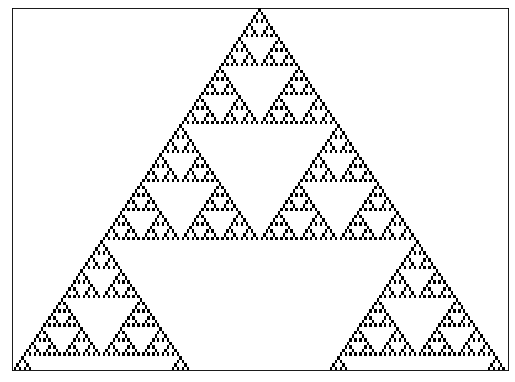

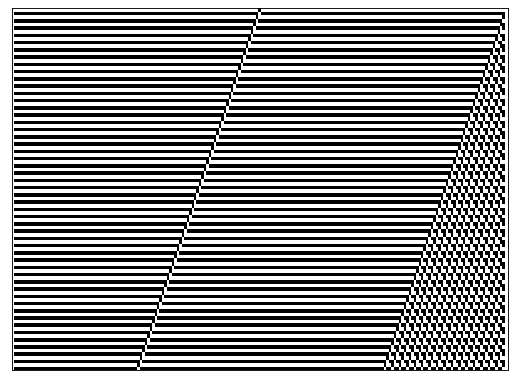

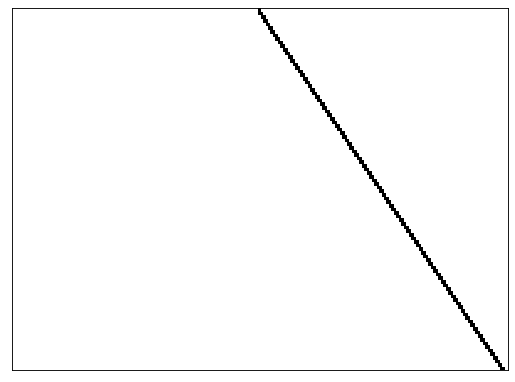

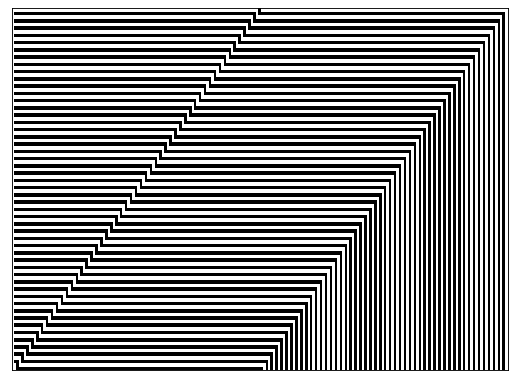

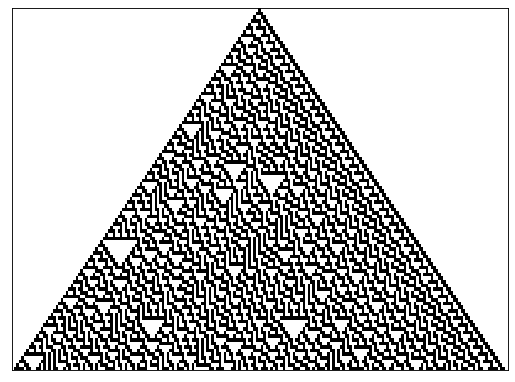

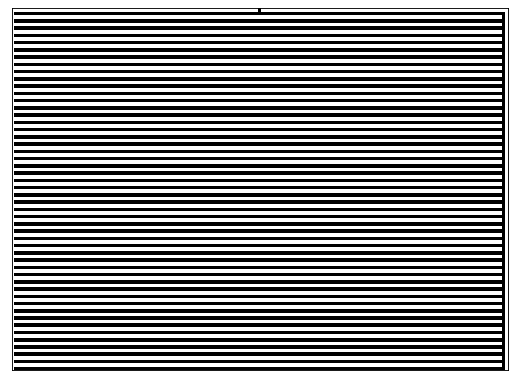

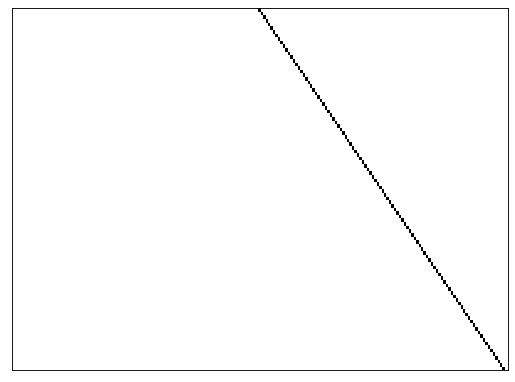

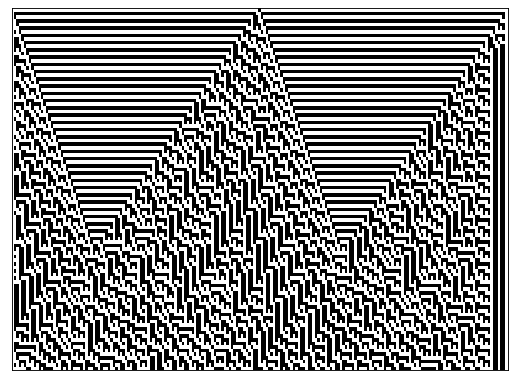

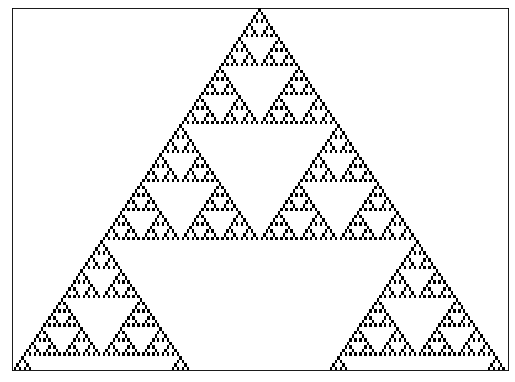

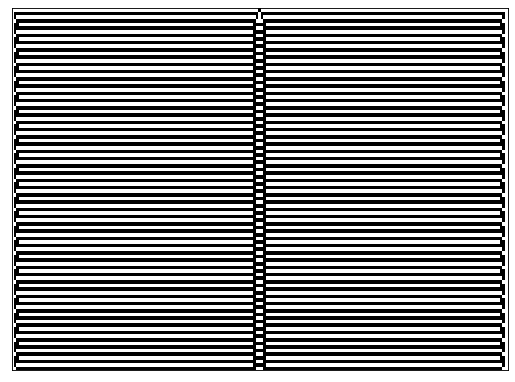

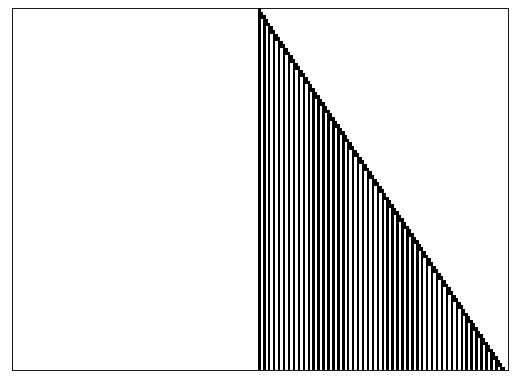

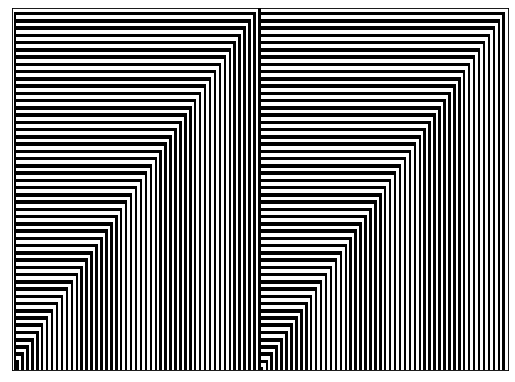

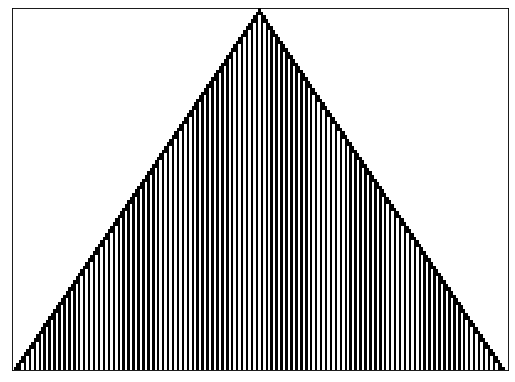

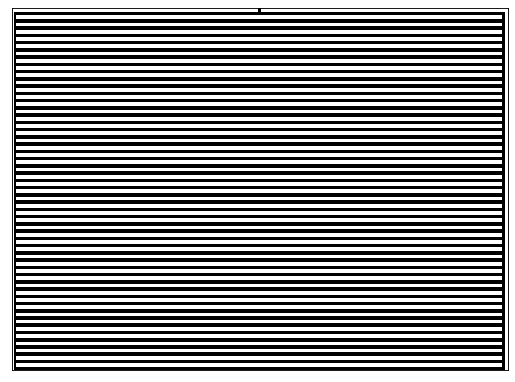

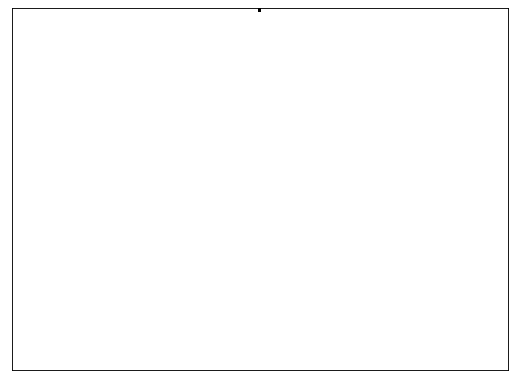

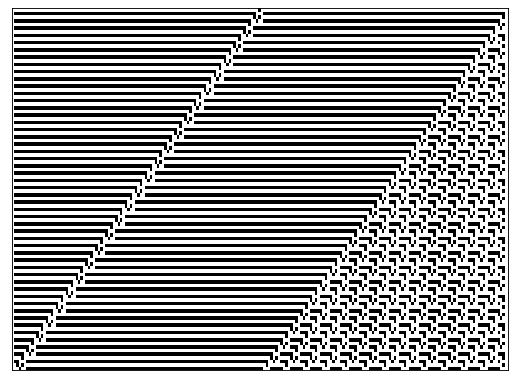

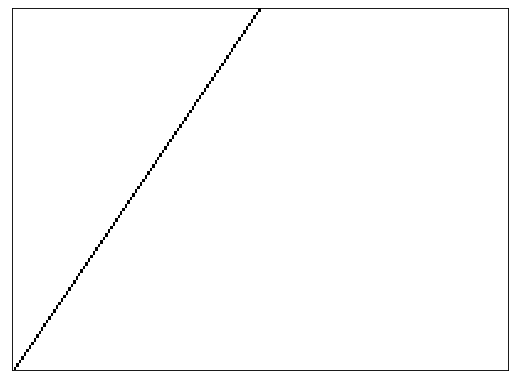

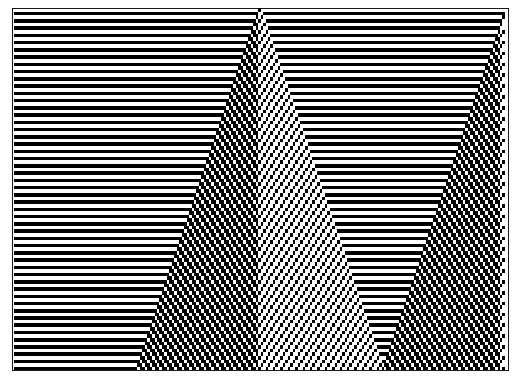

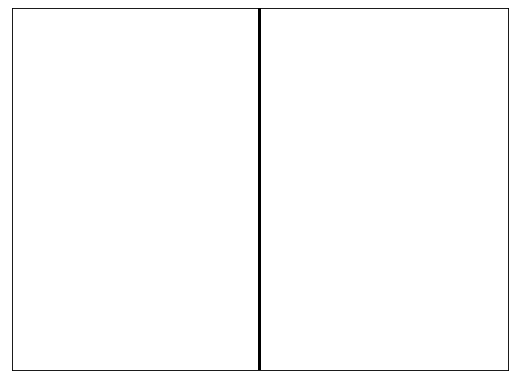

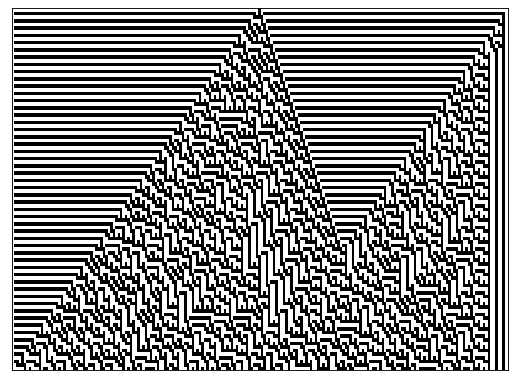

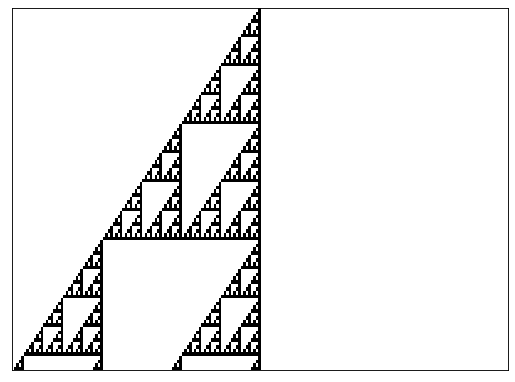

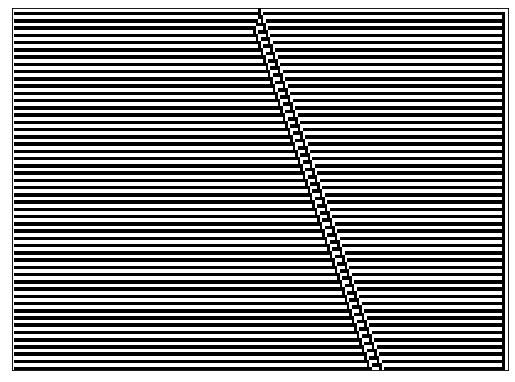

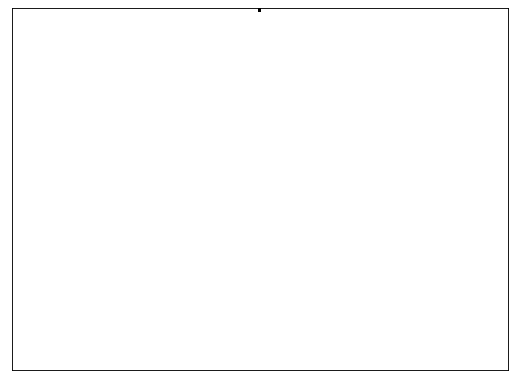

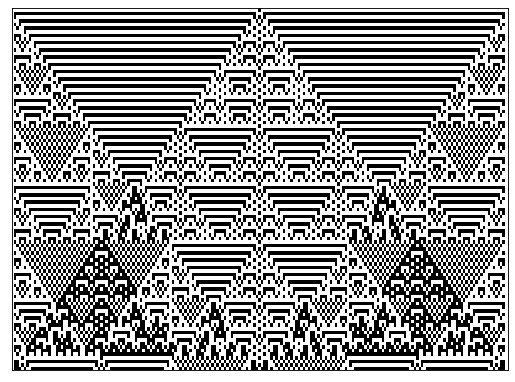

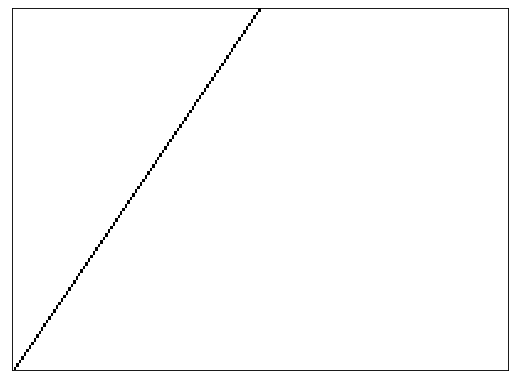

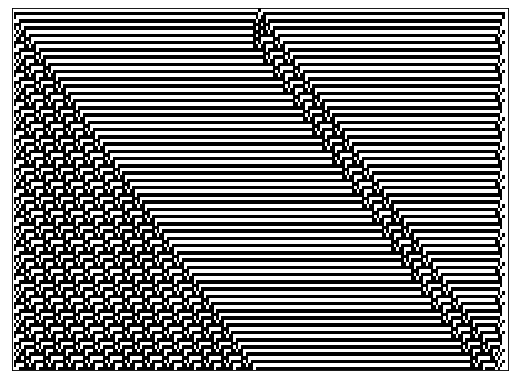

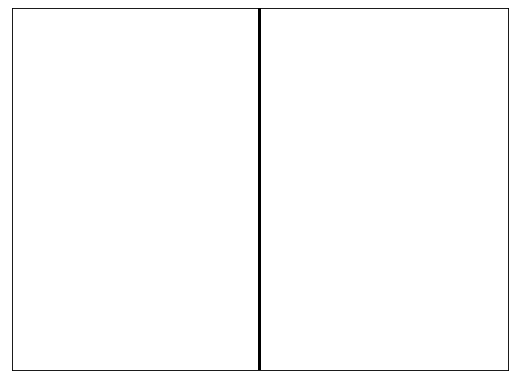

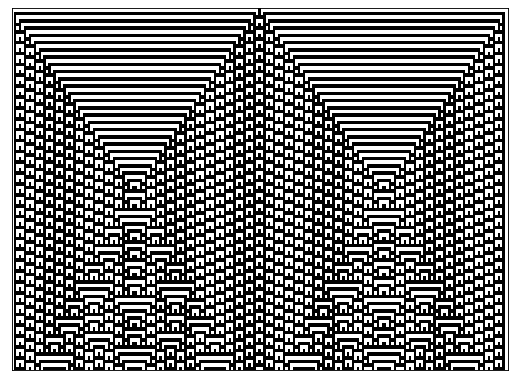

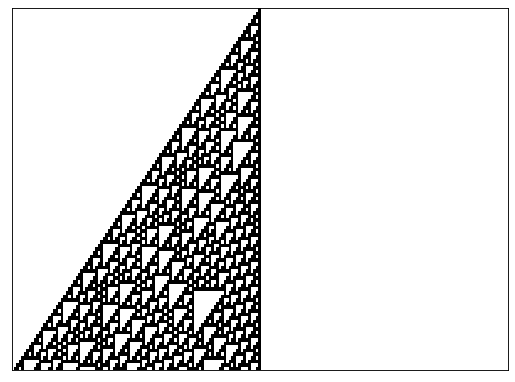

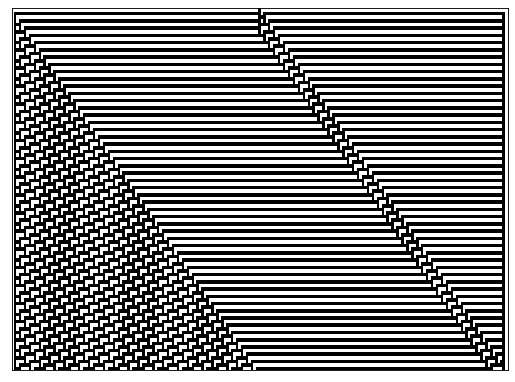

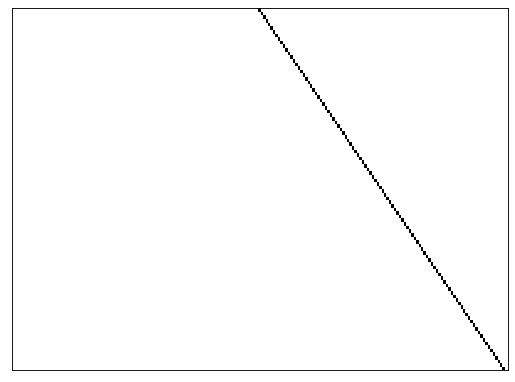

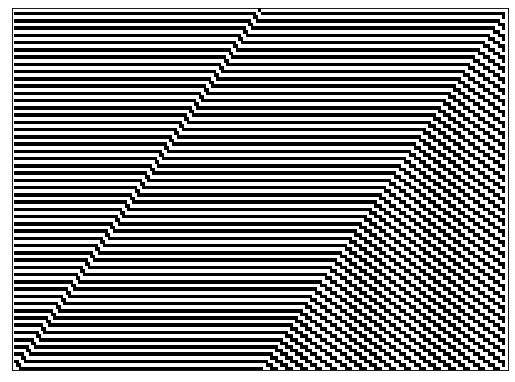

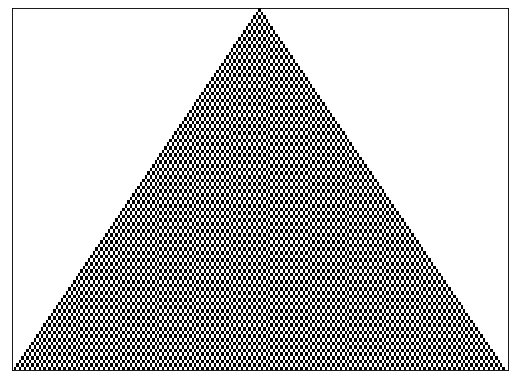

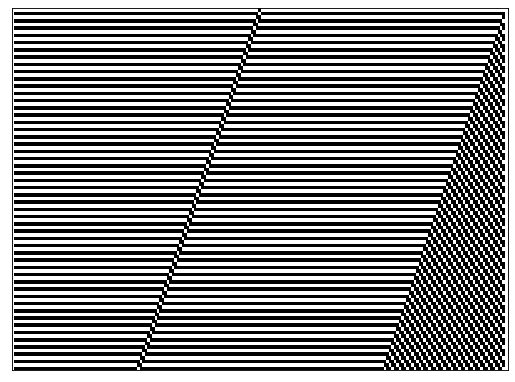

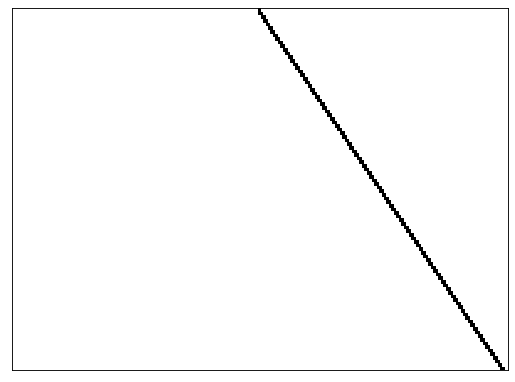

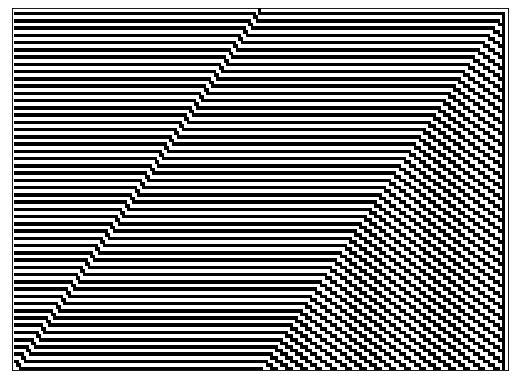

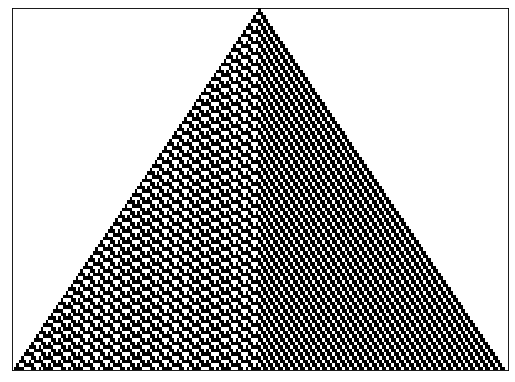

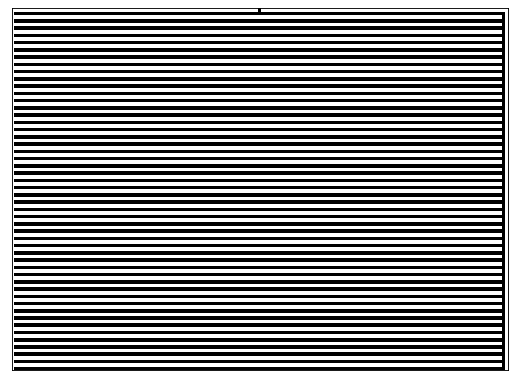

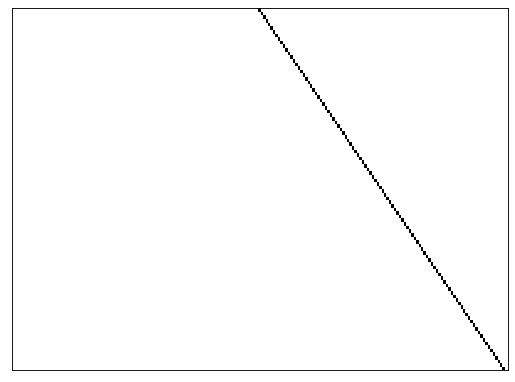

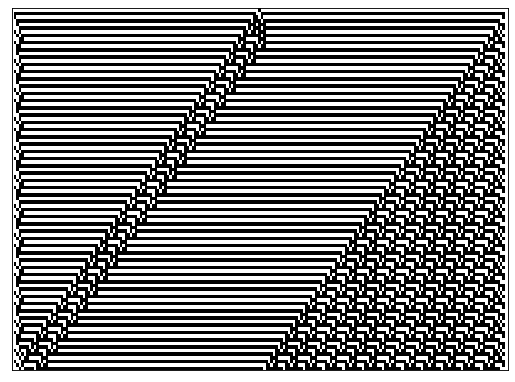

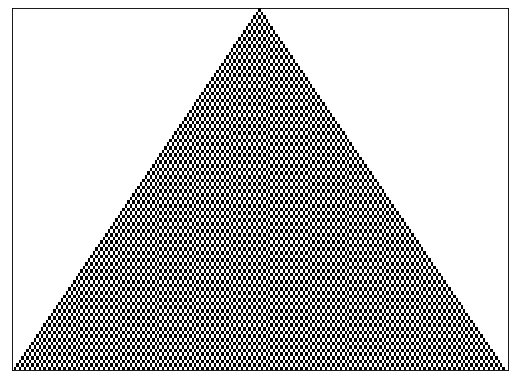

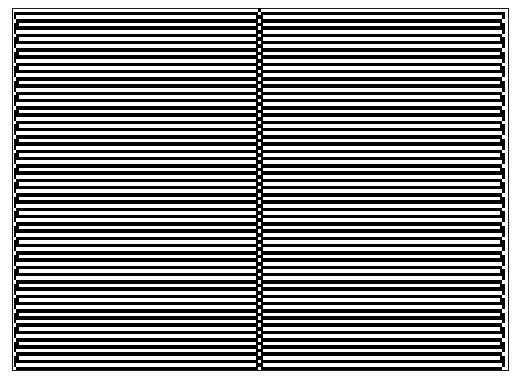

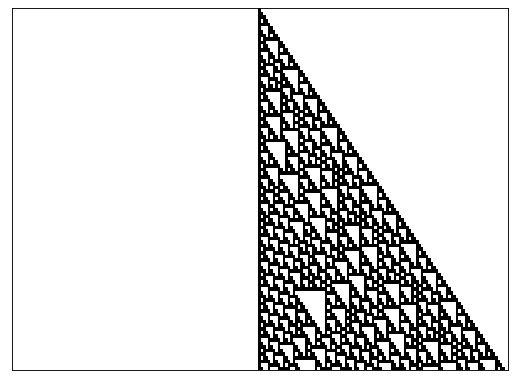

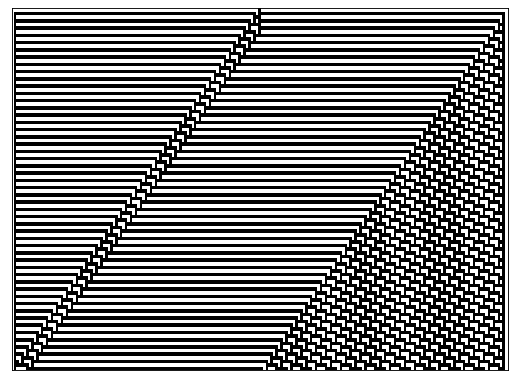

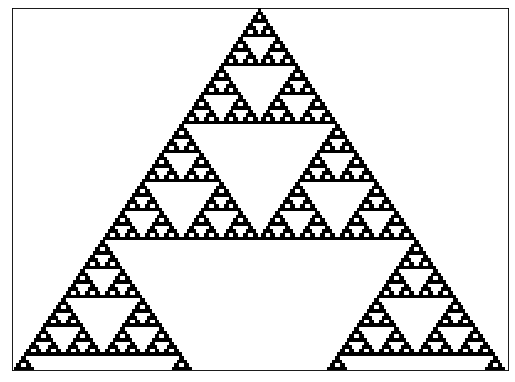

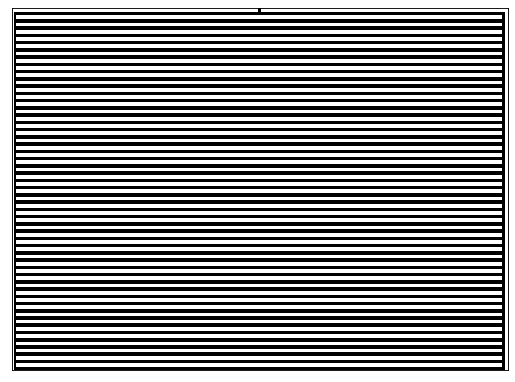

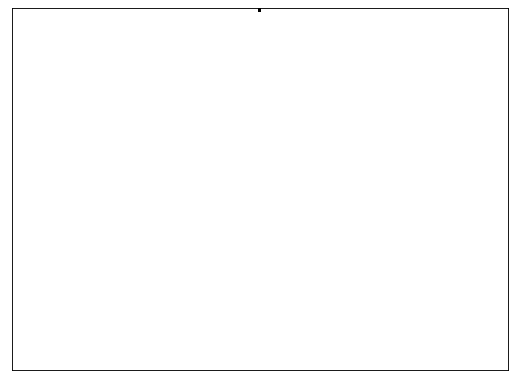

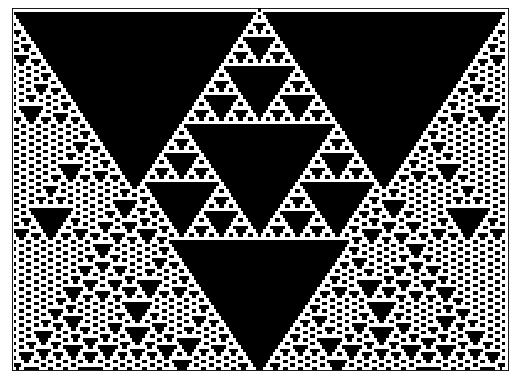

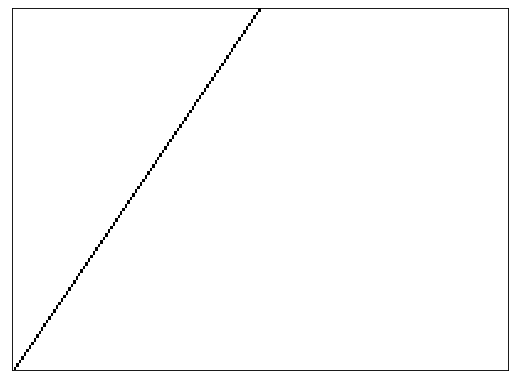

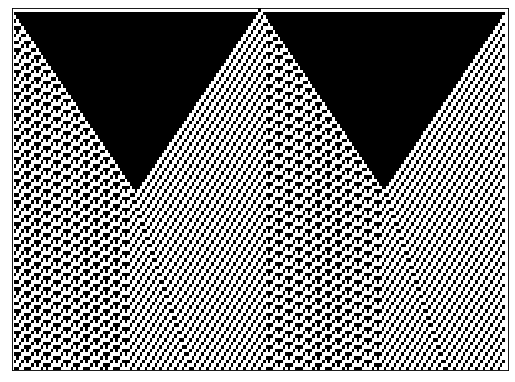

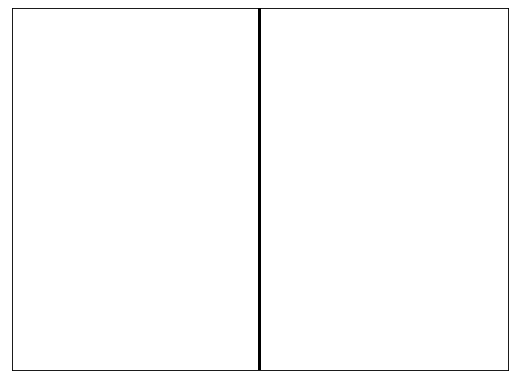

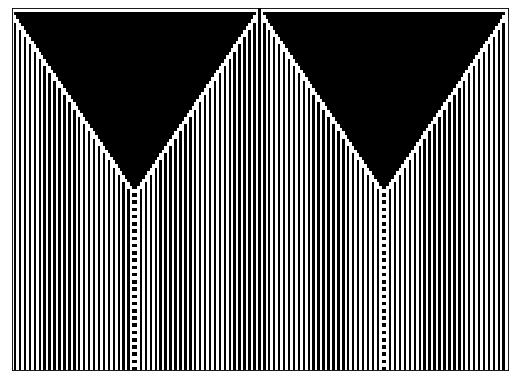

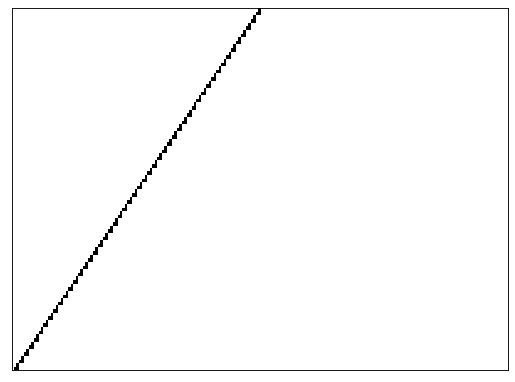

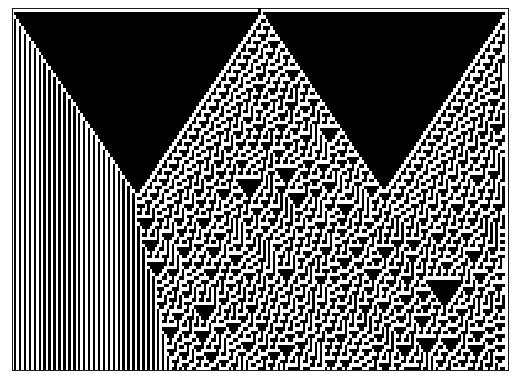

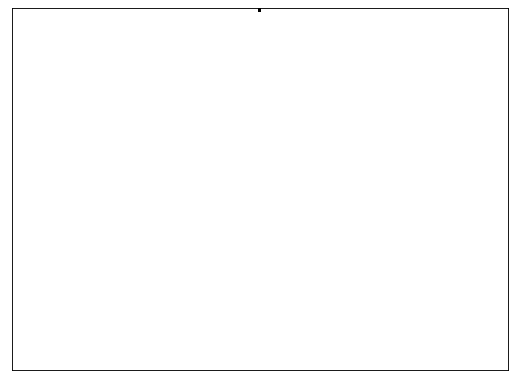

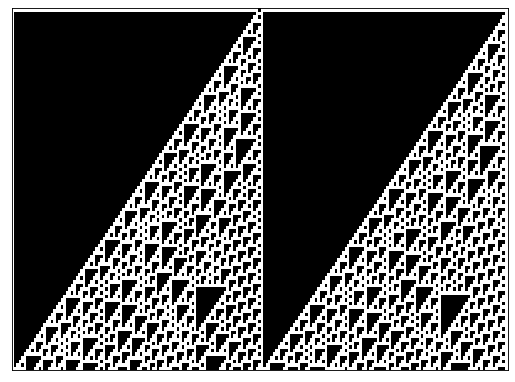

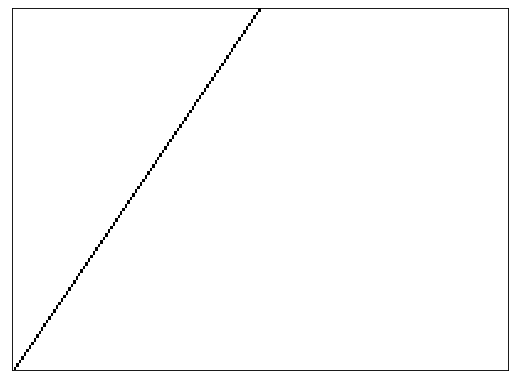

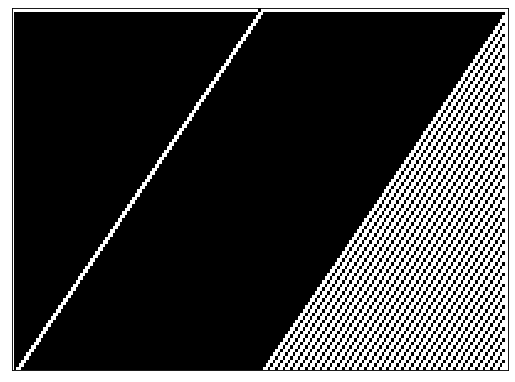

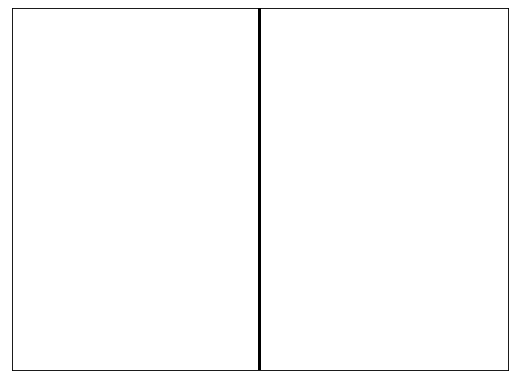

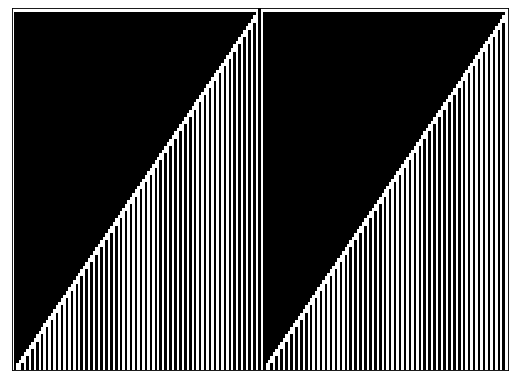

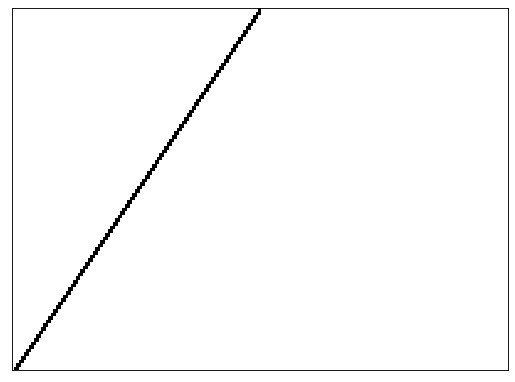

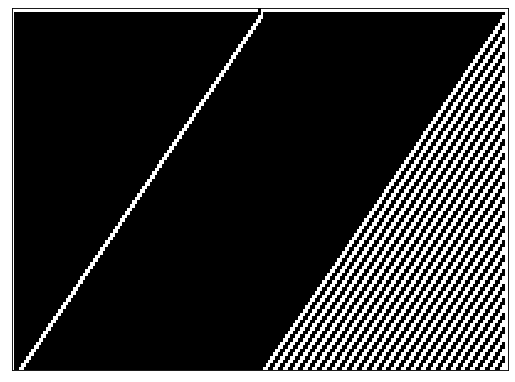

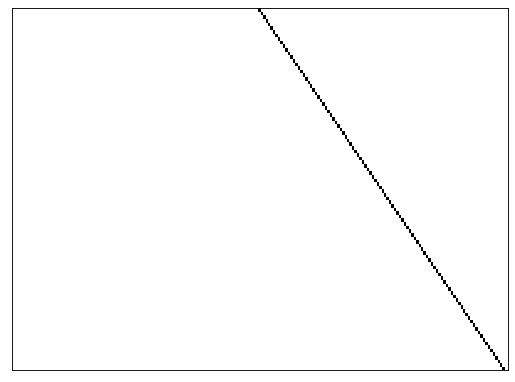

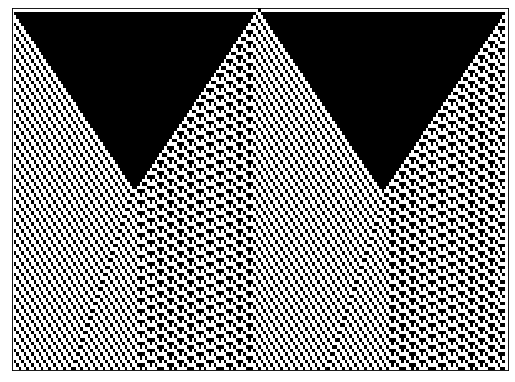

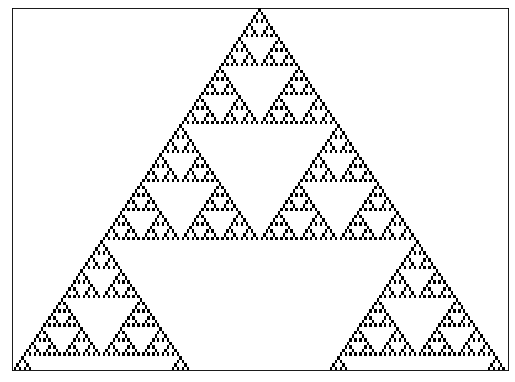

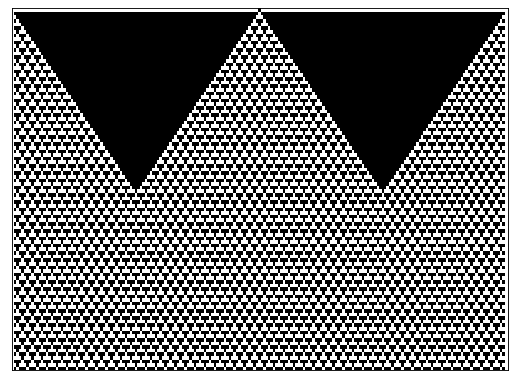

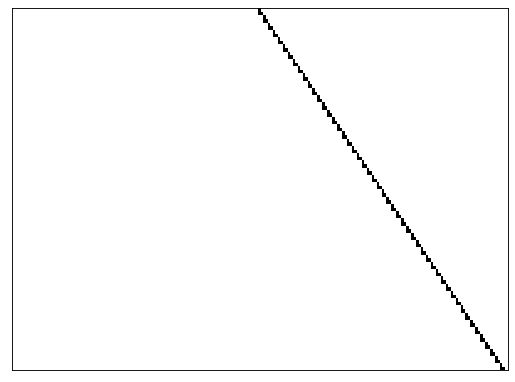

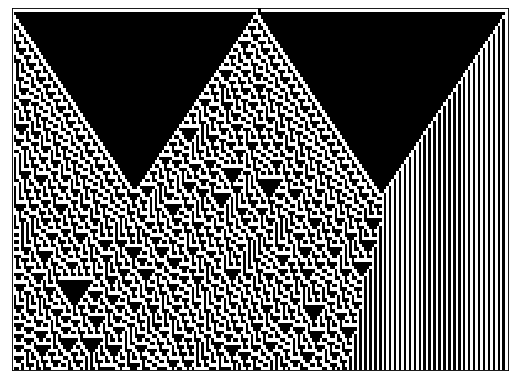

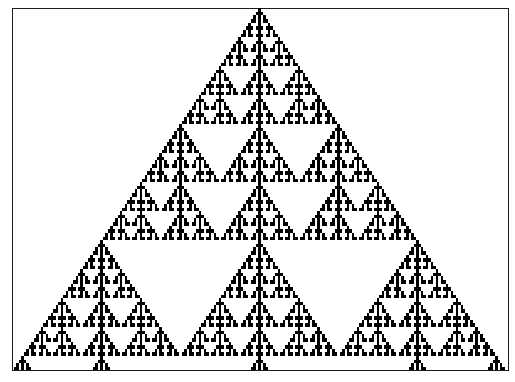

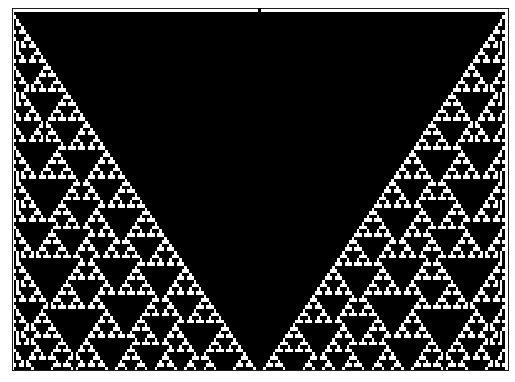

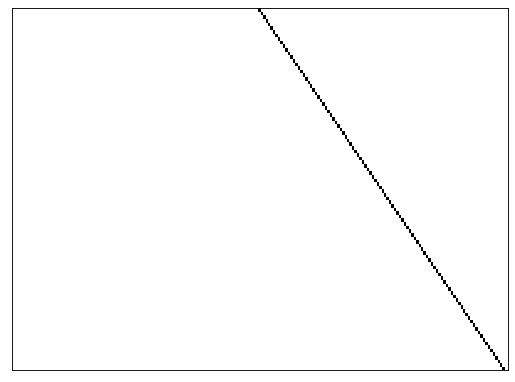

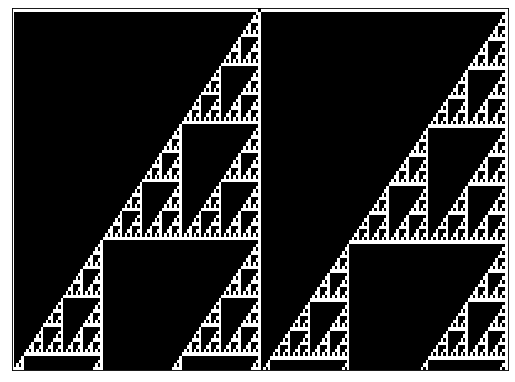

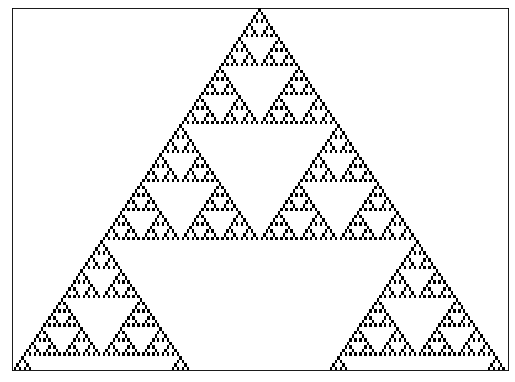

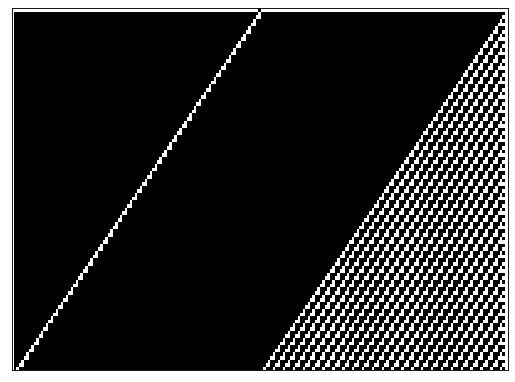

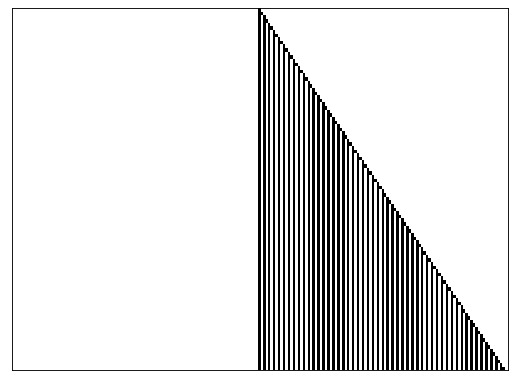

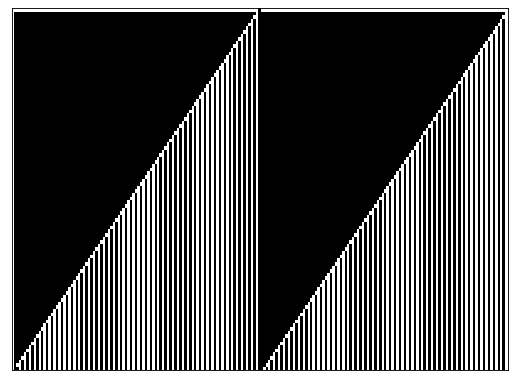

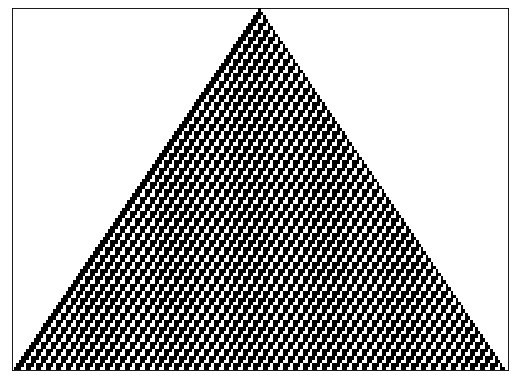

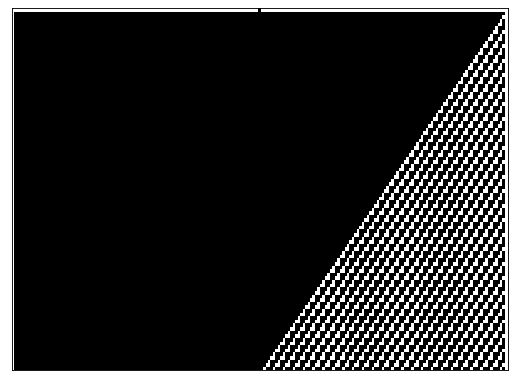

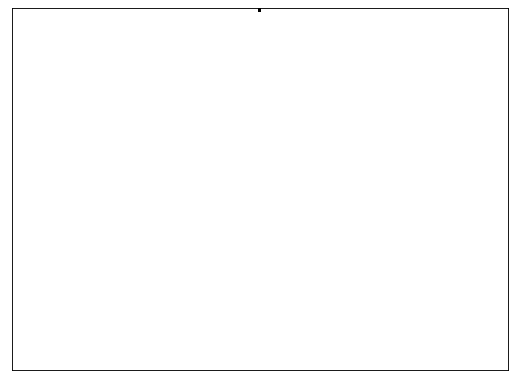

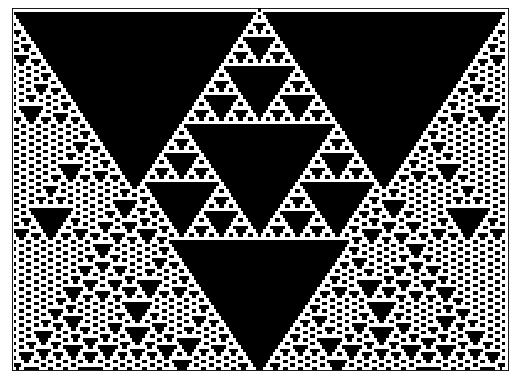

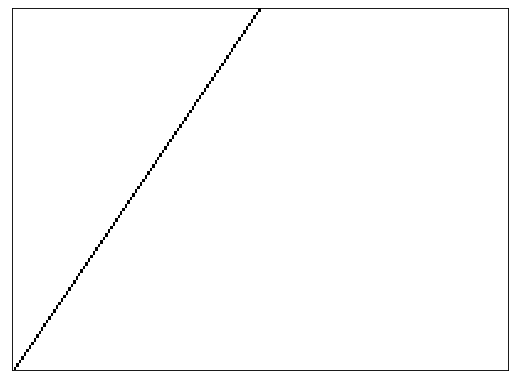

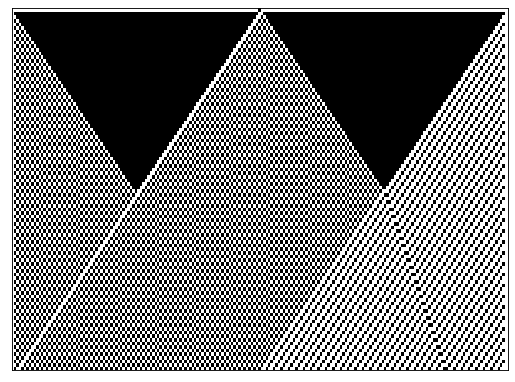

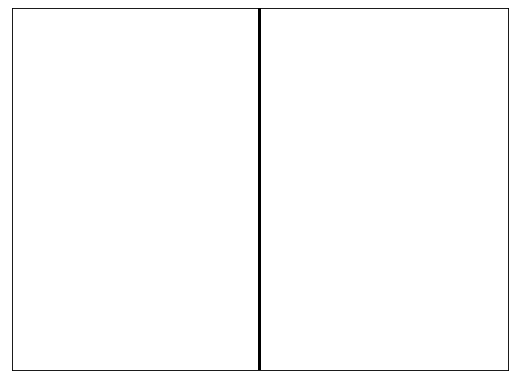

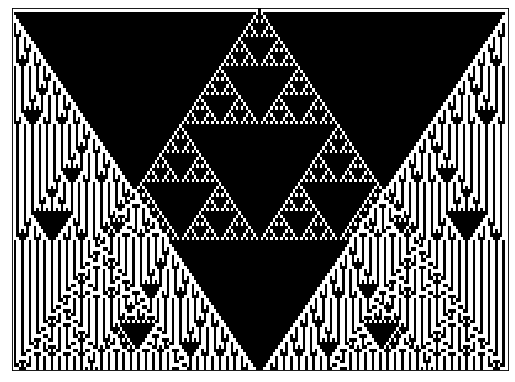

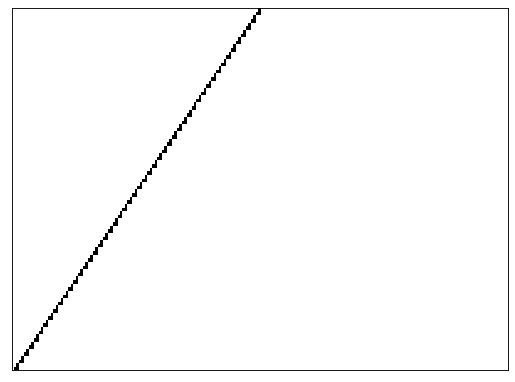

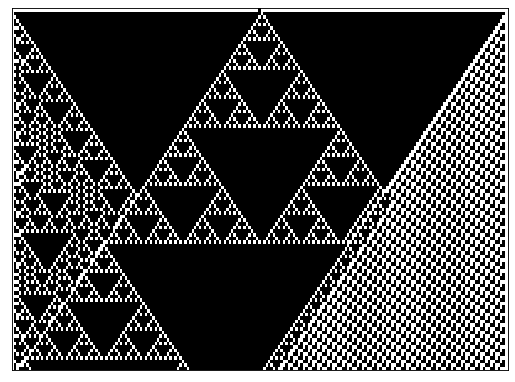

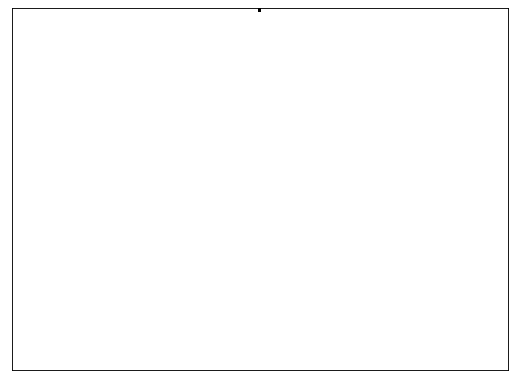

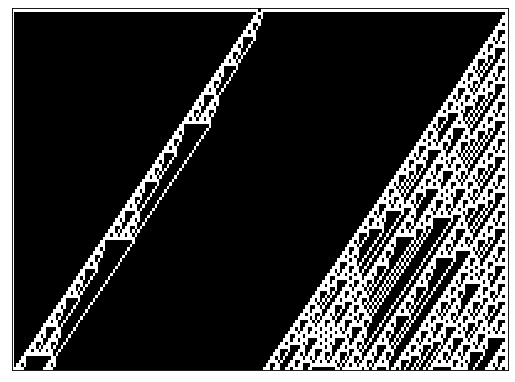

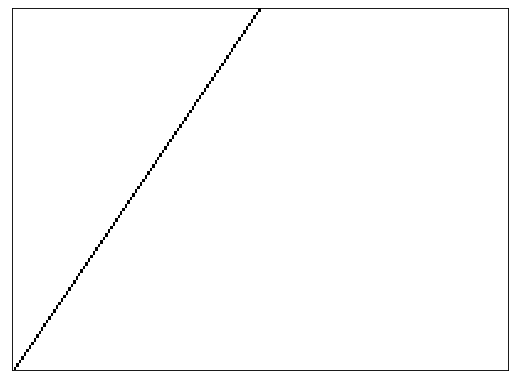

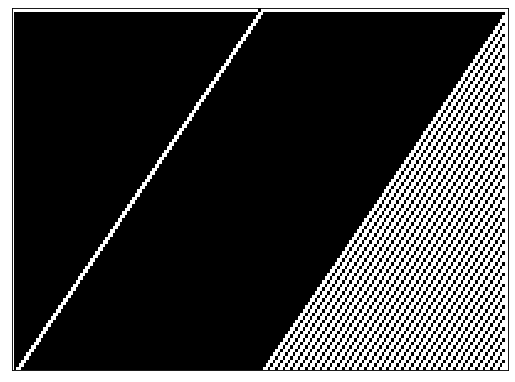

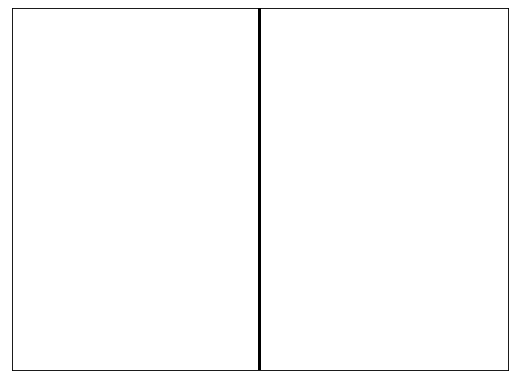

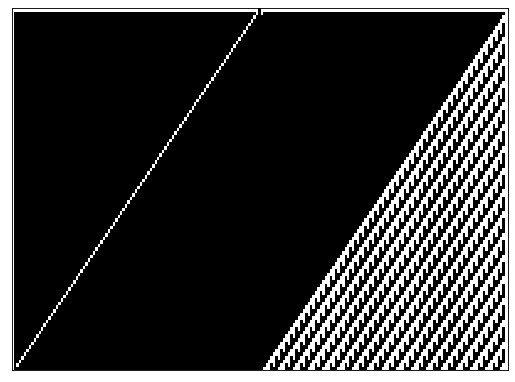

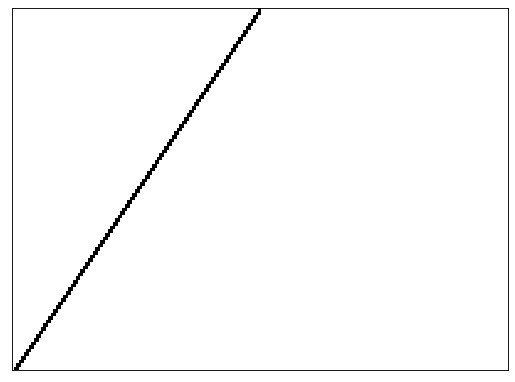

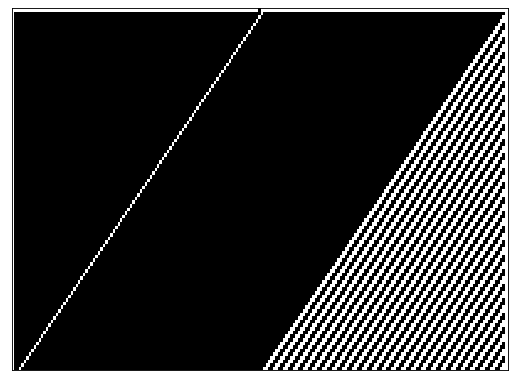

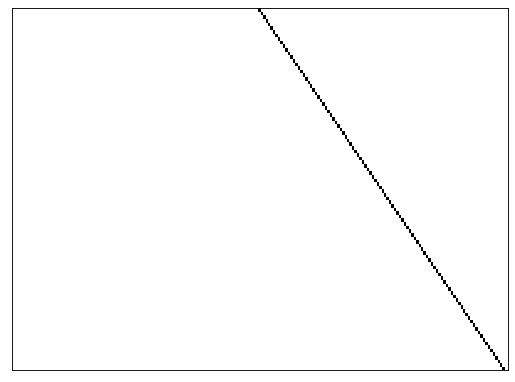

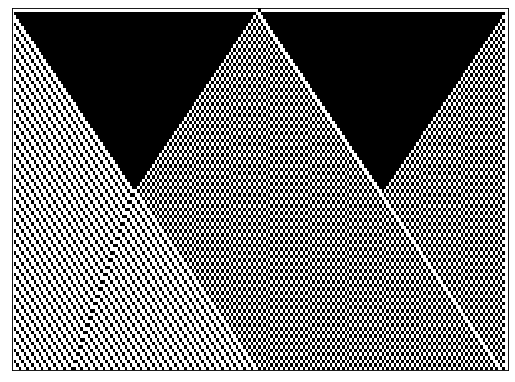

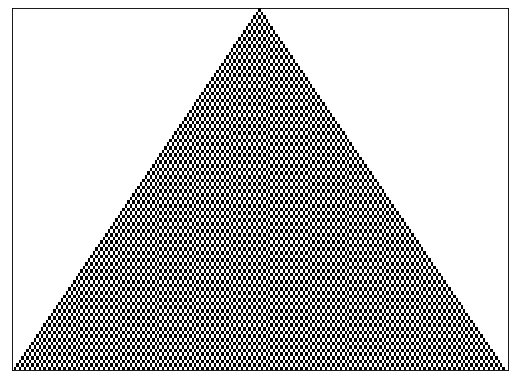

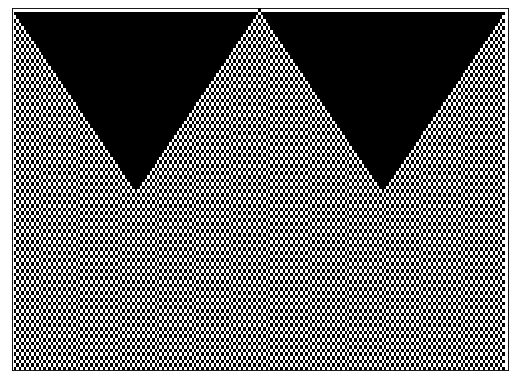

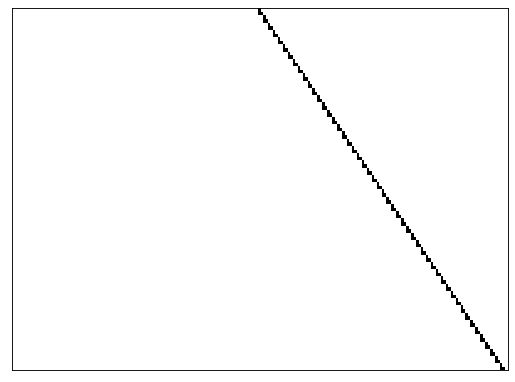

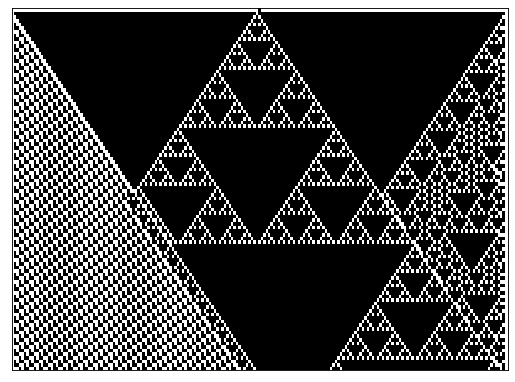

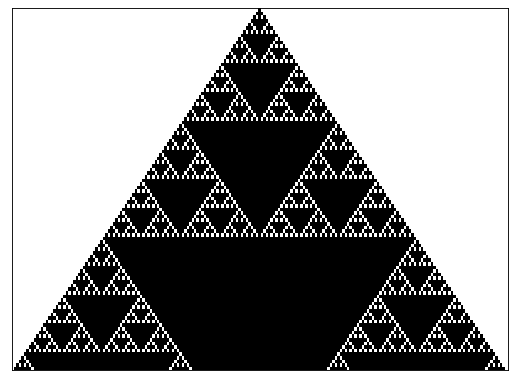

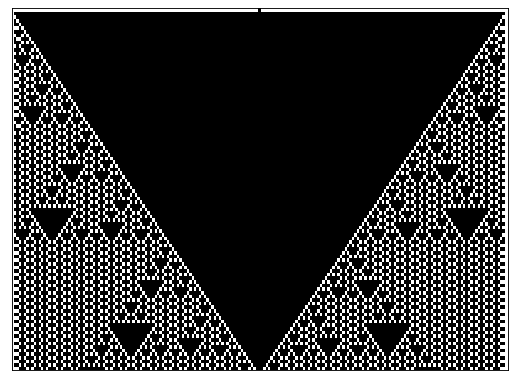

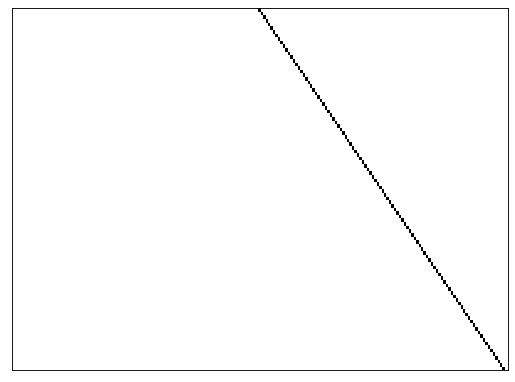

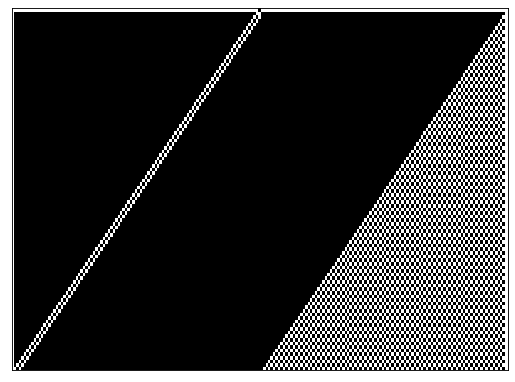

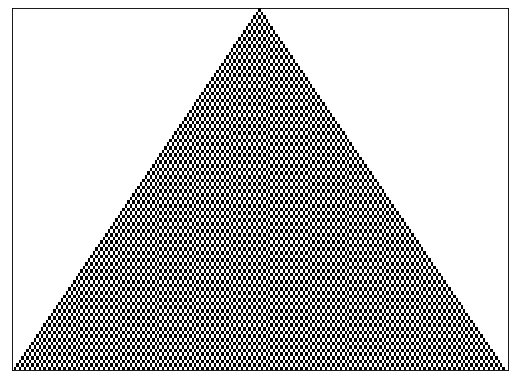

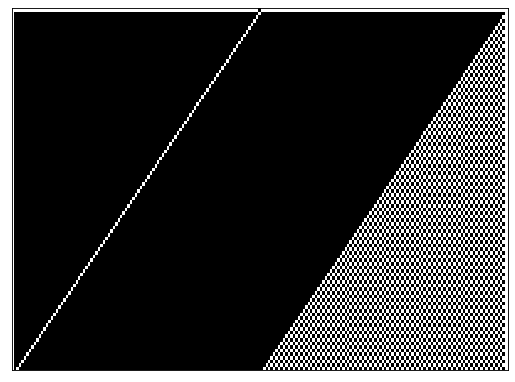

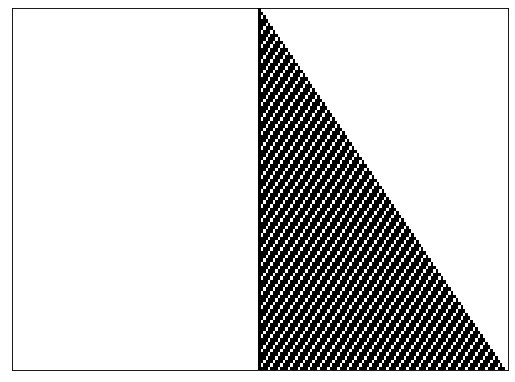

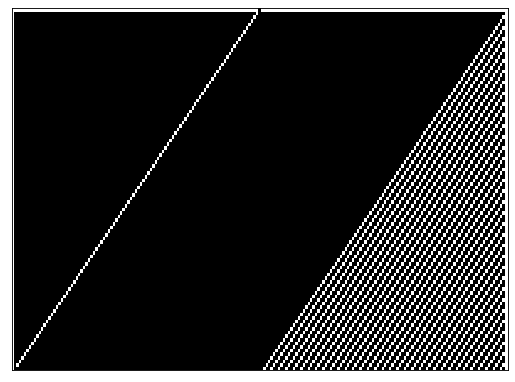

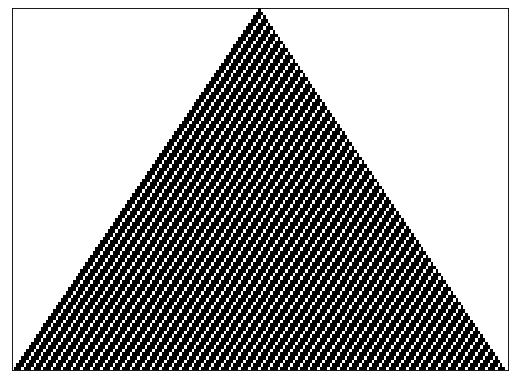

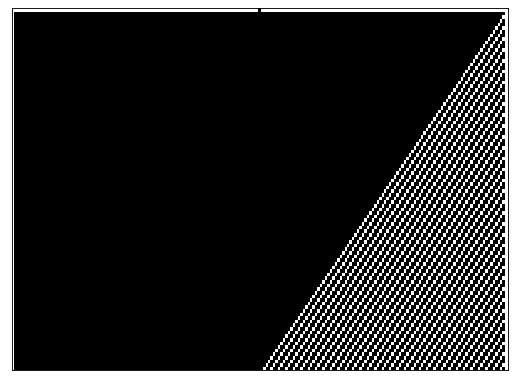

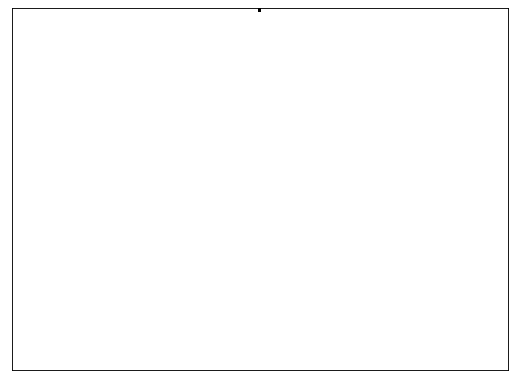

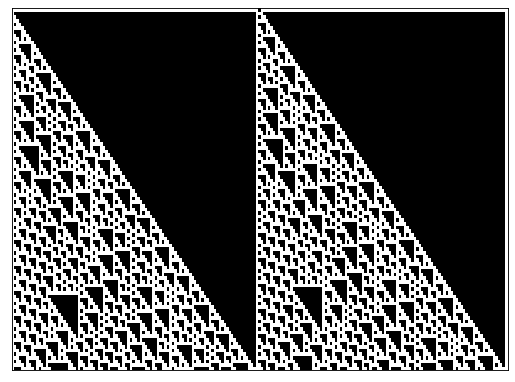

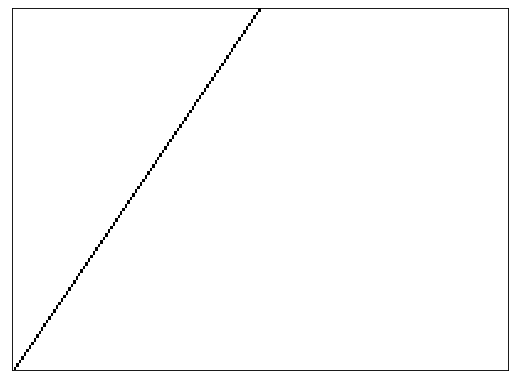

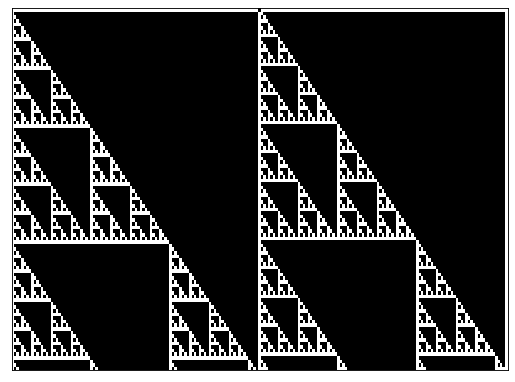

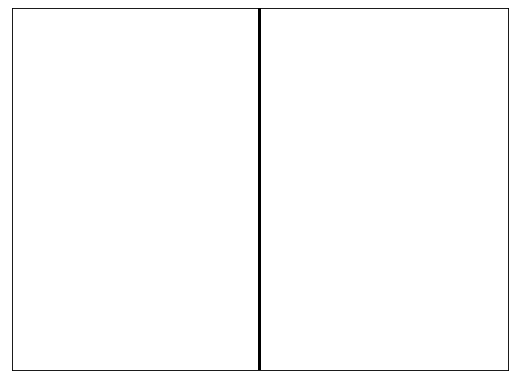

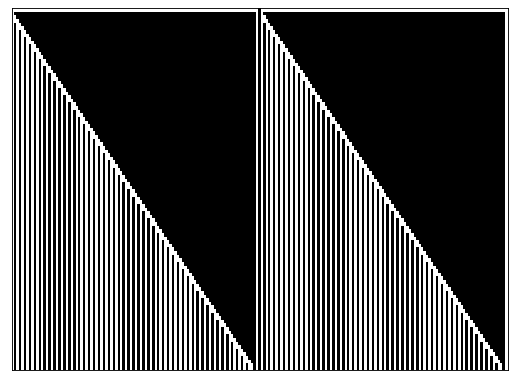

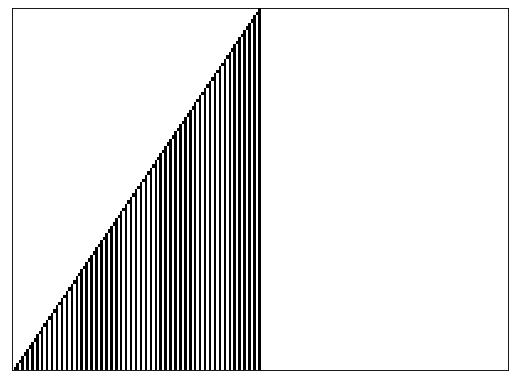

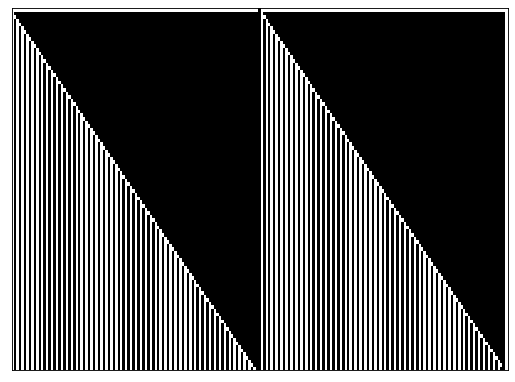

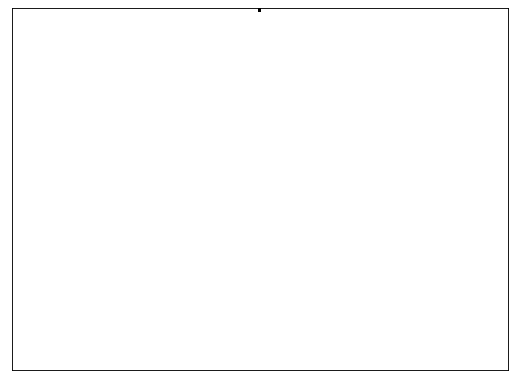

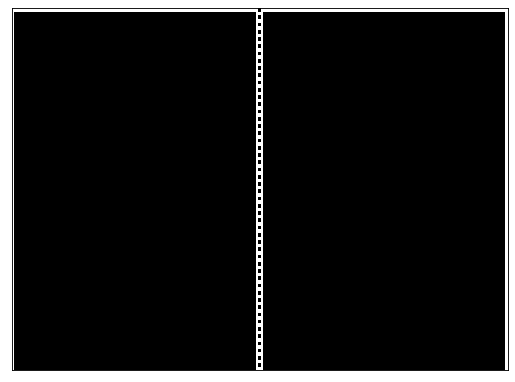

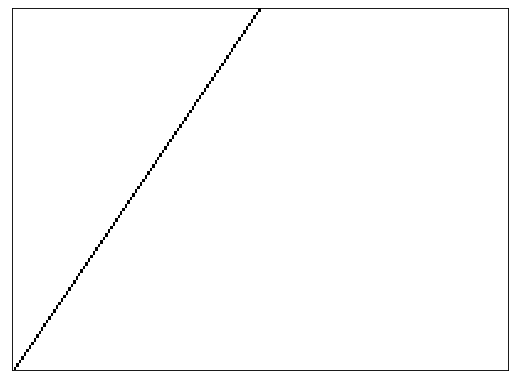

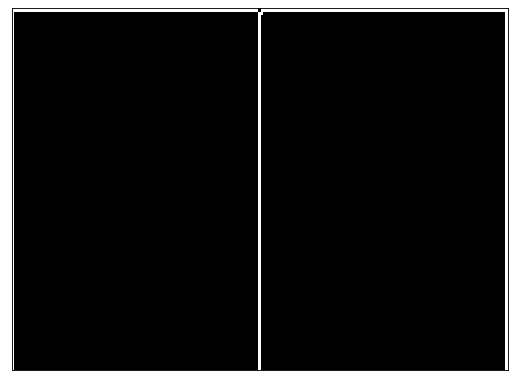

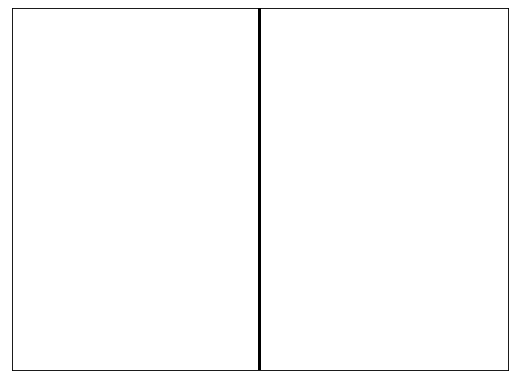

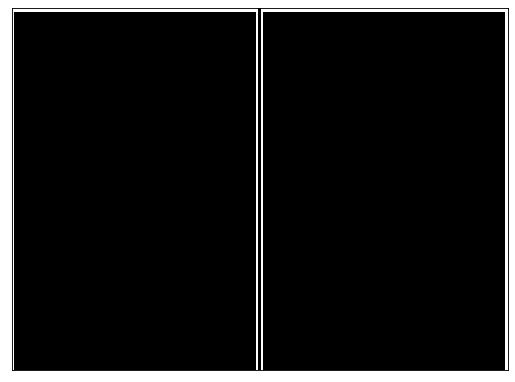

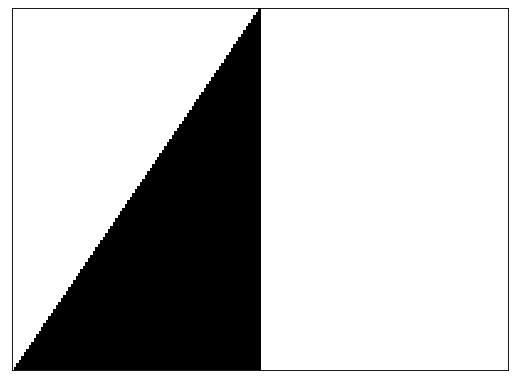

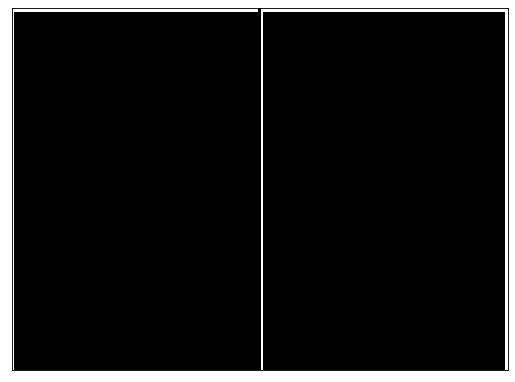

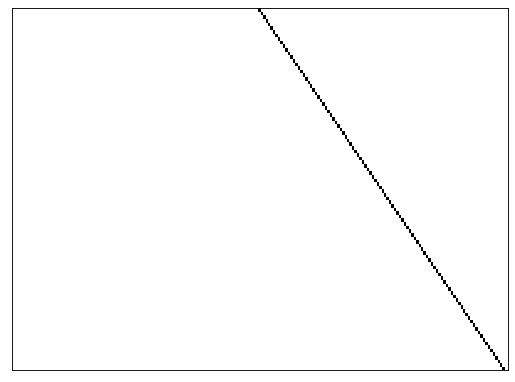

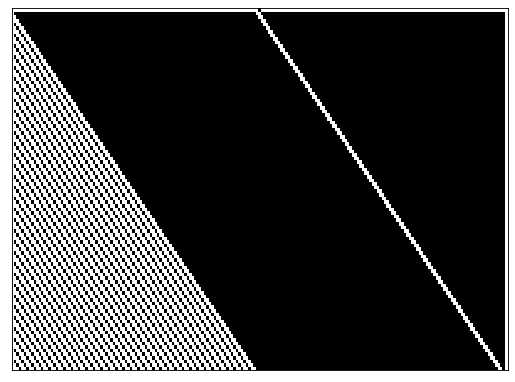

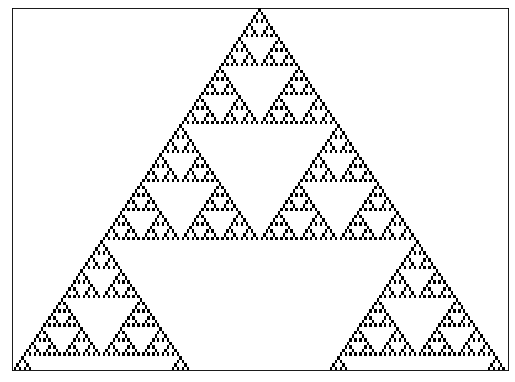

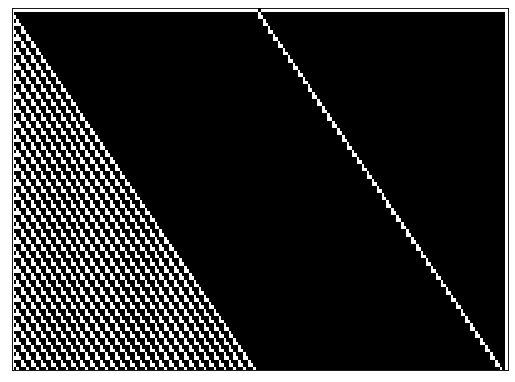

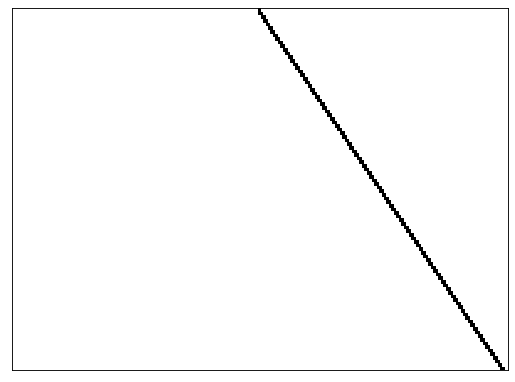

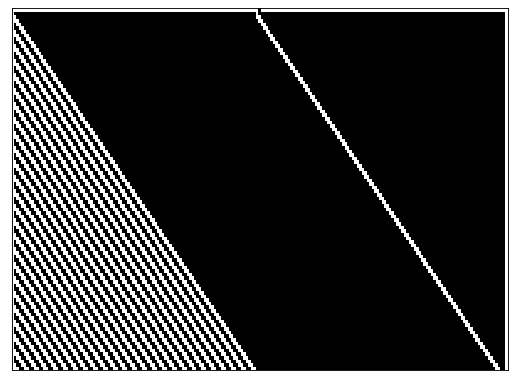

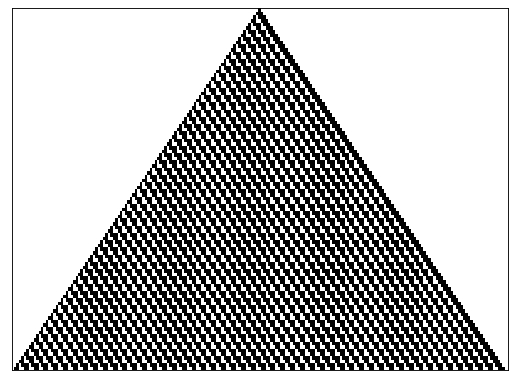

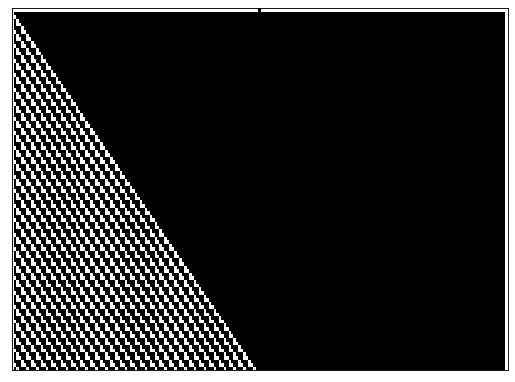

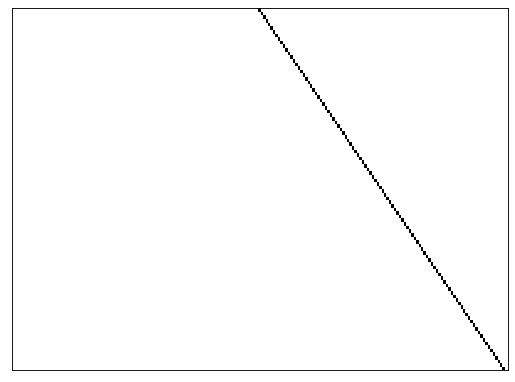

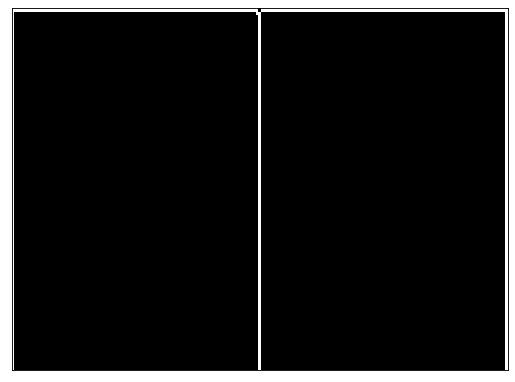

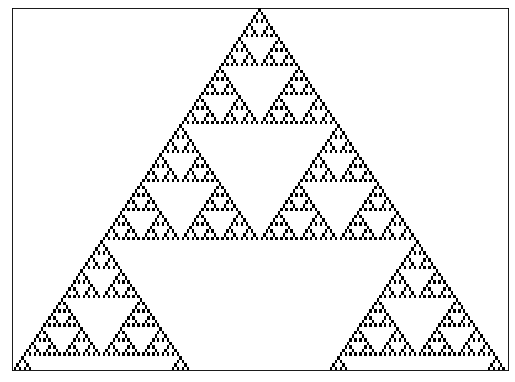

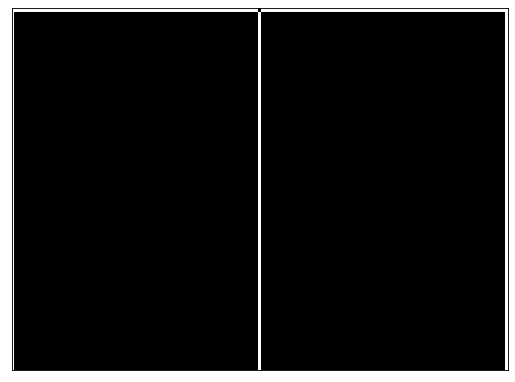

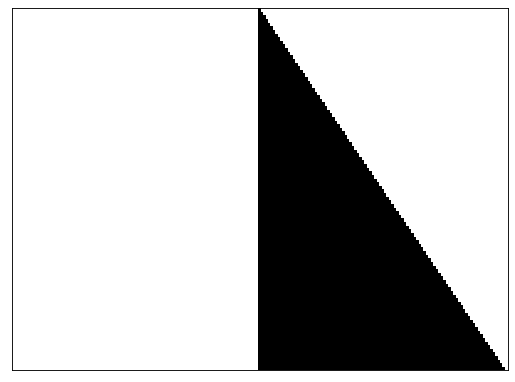

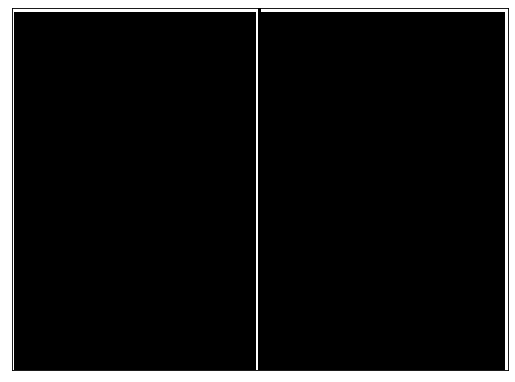

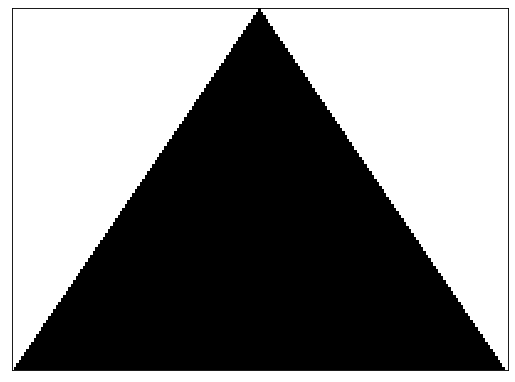

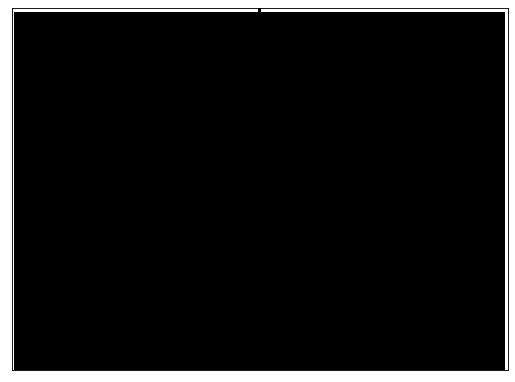

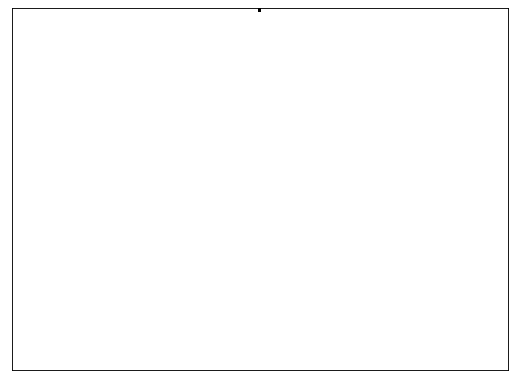

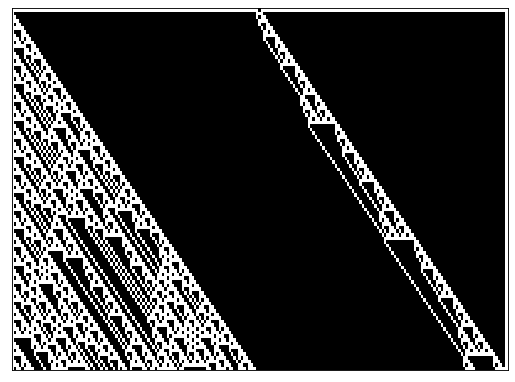

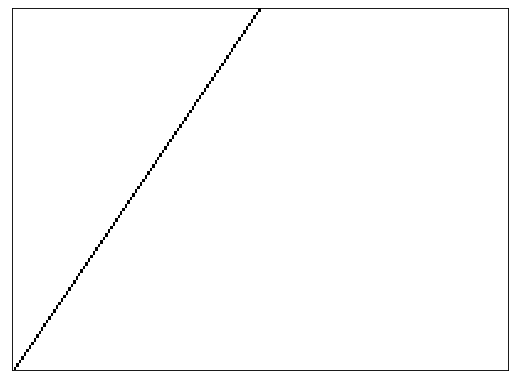

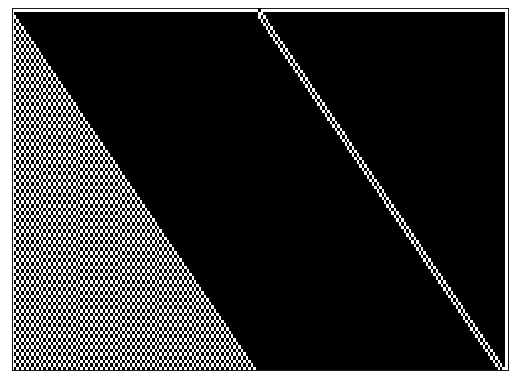

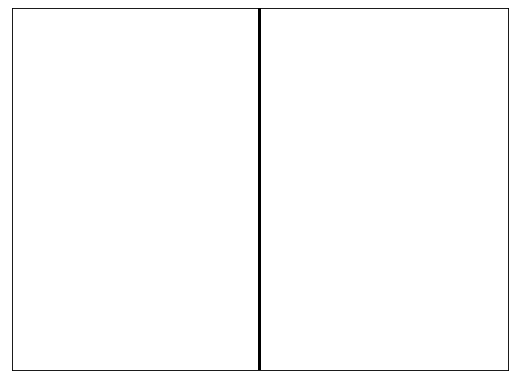

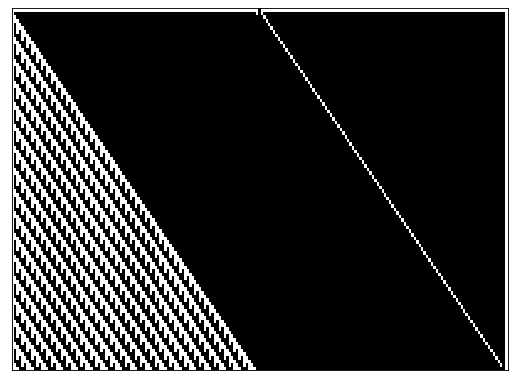

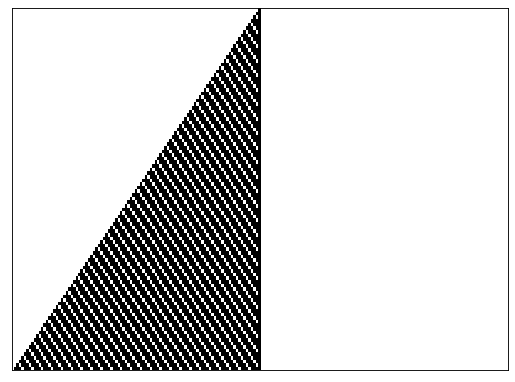

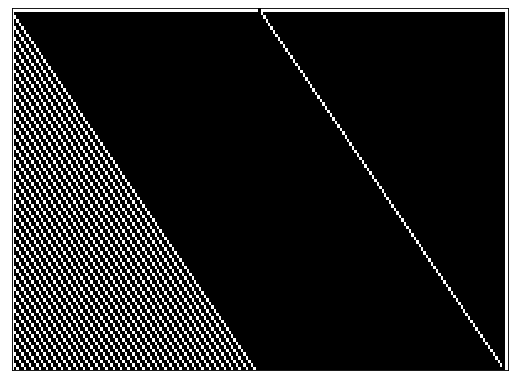

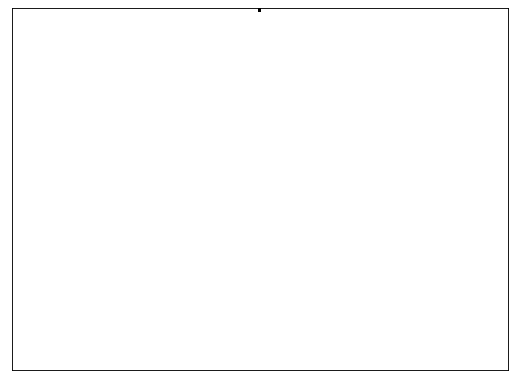

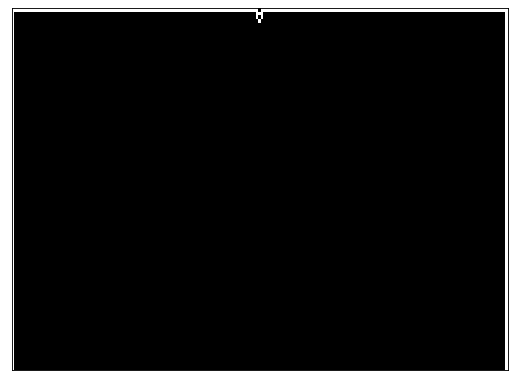

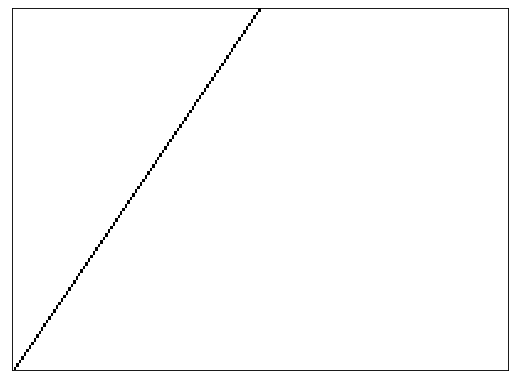

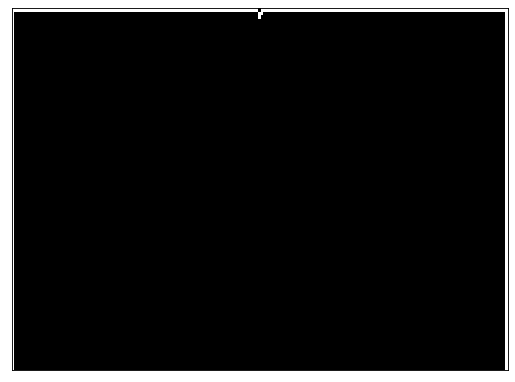

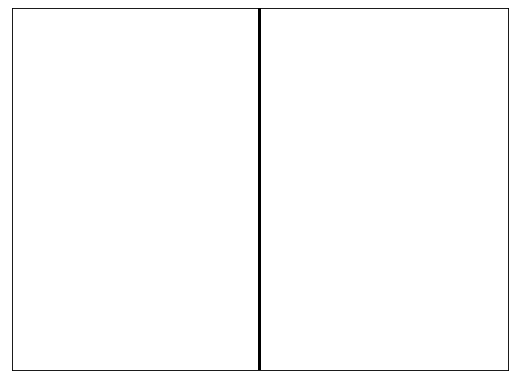

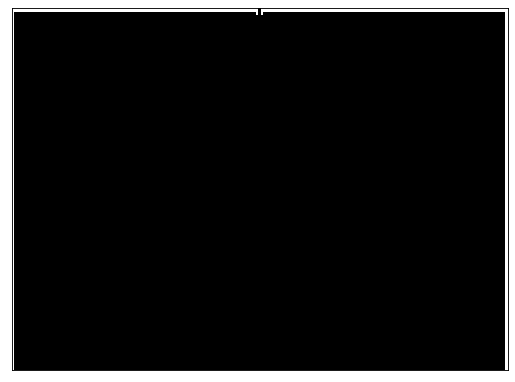

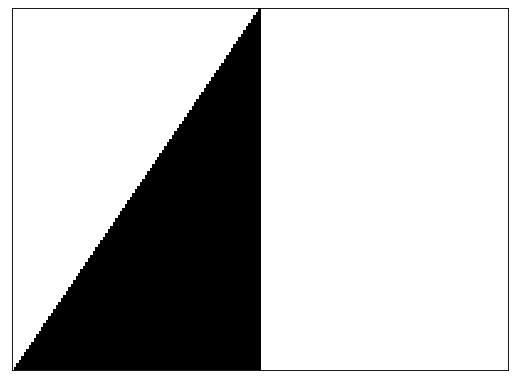

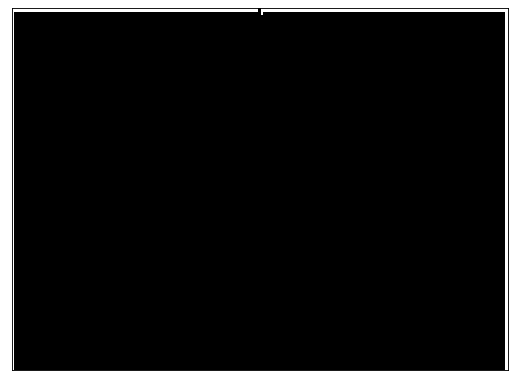

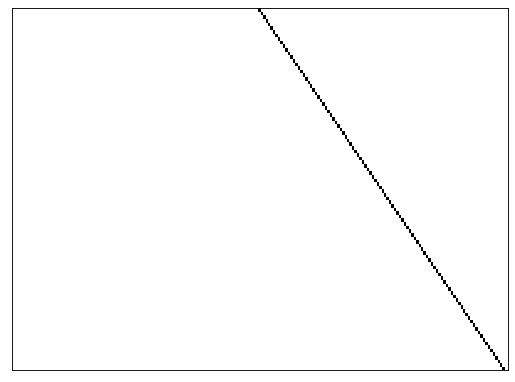

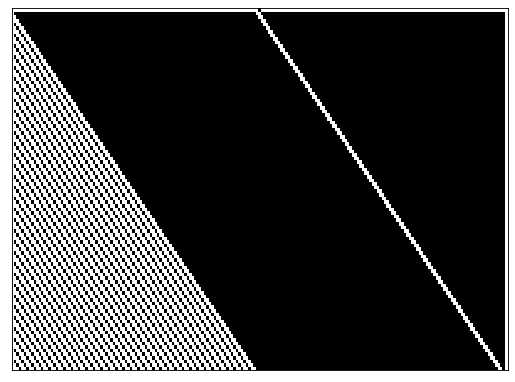

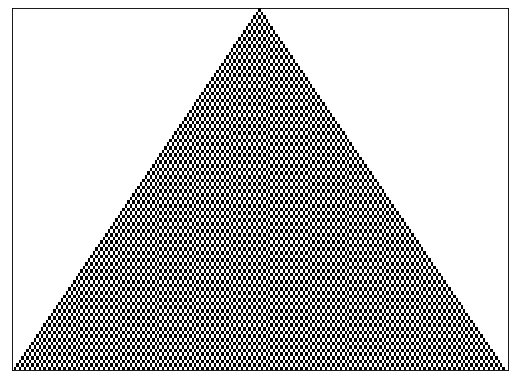

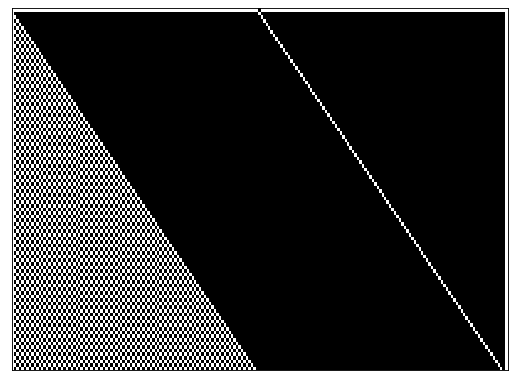

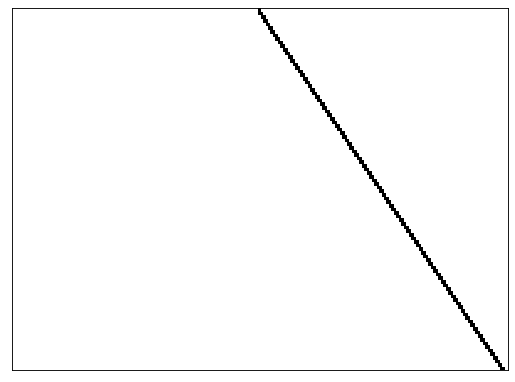

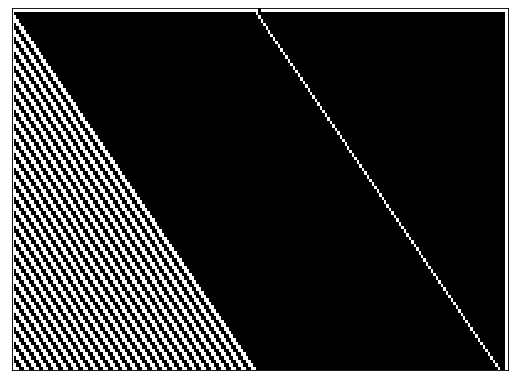

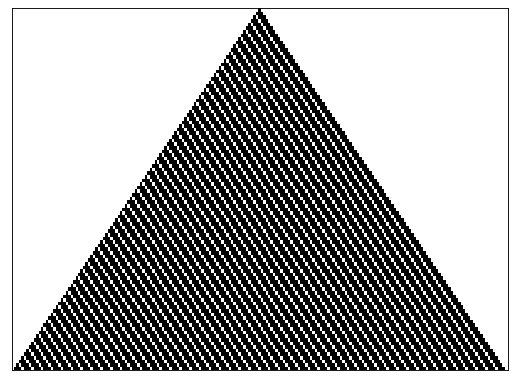

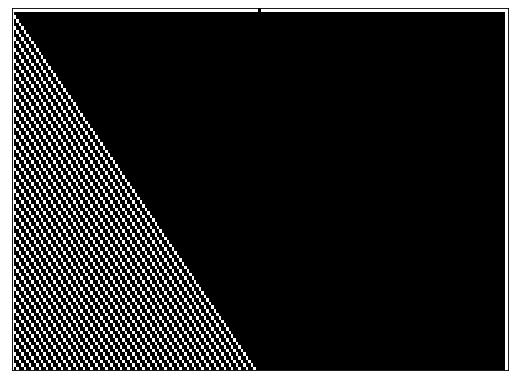

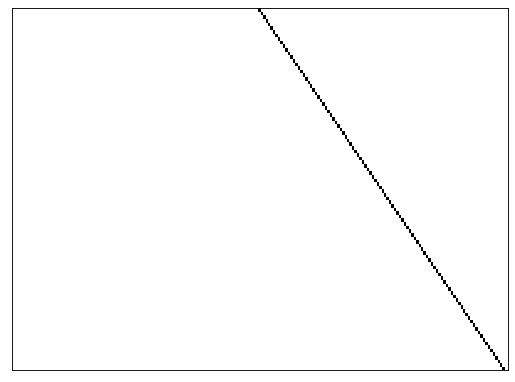

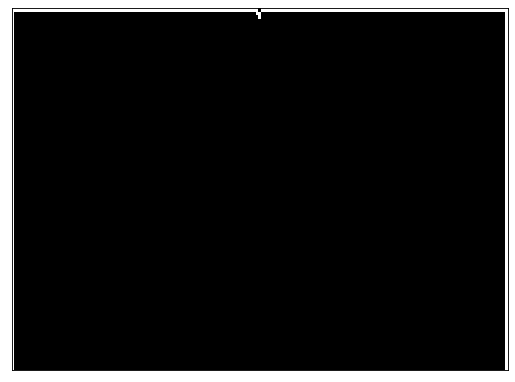

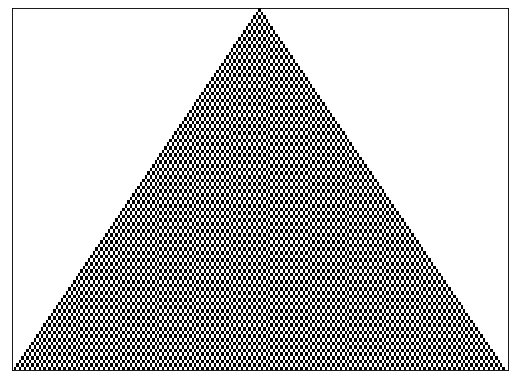

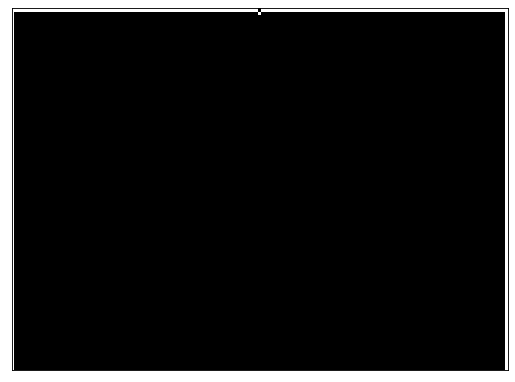

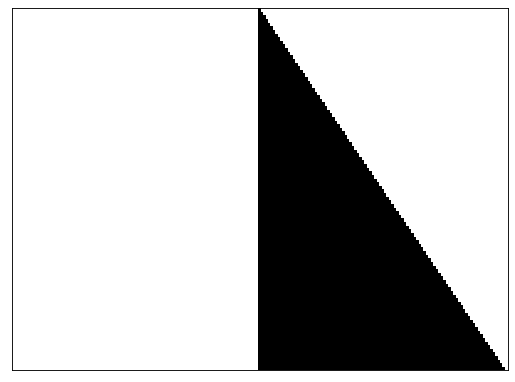

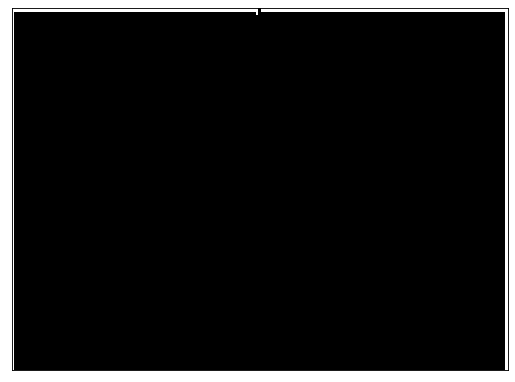

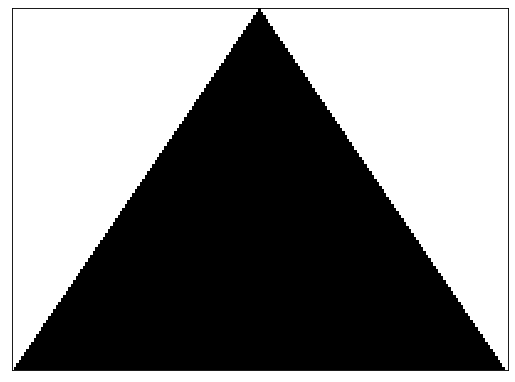

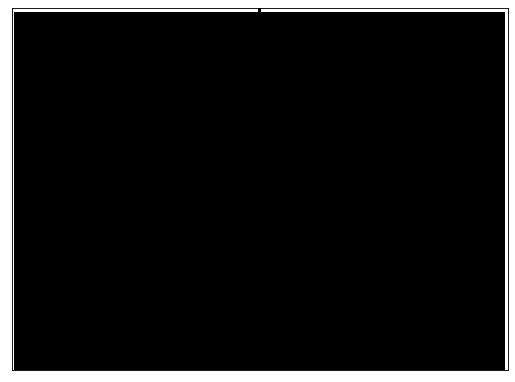

In [8]:
fig, ax = plt.subplots(20,20, figsize=(10,6))
for i in range (256):
        rule = i
        n = 100
        ca = CA(rule, n)
        ca.start_single()
        ca.loop(n-1)
        drawer = CADrawer()
        drawer.draw(ca)
        drawer.show()

In [2]:
fig, ax = plt.subplots(2,2, figsize=(10,10))
for i in range(2):
    for j in range(2):
        ax[i,j.imgshow()

SyntaxError: unexpected EOF while parsing (1271064445.py, line 4)

<div class="alert alert-info">
    
**Ejercicio:** La página de la [wikipedia](http://en.wikipedia.org/wiki/Cellular_automaton#Classification) menciona 4 clasificaciones ¿Puedes identificarlos en tu gráfica?
</div>

<div class="alert alert-info">
    
**Ejercicio:** Escribe una animación interactiva en la cual, reciba la regla, el intervalo del tiempo y con eso la vaya dibujando de manera animada.
</div>